In [308]:
# https://jupiter.to.ee/~tonis/filtrid/B/
# https://www.w3schools.com/python/pandas

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#open(https://jupiter.to.ee/~tonis/filtrid/B/B_19-27-47.txt, encoding='ASCI')

In [312]:
DEBUG = False

In [314]:
kataloog = 'filtrid/'

In [367]:
def joonis_standardiga(andmed1, andmed2, pealkiri="", faili_nimi="", tee_pdf=False):
    """Paneb kokku standardfiltri ja mõõdetud filtri joonised.

    Parameters
    ---------
        andmed1 : 
            pandas dataframe (mõõdetud andmed)
        andmed2 : 
            pandas dataframe (standard andmed)
        pealkiri : str
            joonise pealkiri
        faili_nimi : str
            salvestatava joonise faili nimi
        tee_pdf : boolean
            kas salvestada fail pdf kujul
    Returns:
        None
    """
    #Genereerib joonise
    fig, ax = plt.subplots()
    fig.set_figheight(2)
    fig.set_figwidth(3)
    x = andmed1['Lainepikkus']
    y = andmed1['Labipaistvus1']
    ax.plot(x, y, c='black',label='Mõõdetud')
    x2 = andmed2['Lainepikkus']
    y2 = andmed2['Labipaistvus1']
    ax.plot(x2, y2, c="red", label='Standard')
    ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Läbipaistvus', 
           title=pealkiri)
    ax.legend()
    ax.set_ylim((-0.05, 1.05))
    print(faili_nimi)
    if tee_pdf:
        fig.savefig(faili_nimi, bbox_inches ='tight')
    plt.show
    return

<>:28: SyntaxWarning: invalid escape sequence '\A'
<>:29: SyntaxWarning: invalid escape sequence '\A'
<>:28: SyntaxWarning: invalid escape sequence '\A'
<>:29: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kasutaja\AppData\Local\Temp\ipykernel_12716\2344044387.py:28: SyntaxWarning: invalid escape sequence '\A'
  """ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Läbipaistvus')"""
C:\Users\kasutaja\AppData\Local\Temp\ipykernel_12716\2344044387.py:29: SyntaxWarning: invalid escape sequence '\A'
  ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Läbipaistvus',


In [463]:
def filtri_joonis(andmed1, pealkiri="", label='Mõõdetud filter', faili_nimi="", tee_pdf=False):
    """Paneb kokku mõõdetud filtri joonise.

    Parameters
    ---------
        andmed1 : 
            pandas dataframe (mõõdetud andmed)
        pealkiri : str
            joonise pealkiri
        label : str
            joonisel oleva kõvera legend
        faili_nimi : str
            salvestatava joonise faili nimi
        tee_pdf : boolean
            kas salvestada fail pdf kujul
    Returns
    -------
        None
    """
    # Genereerib joonise
    fig, ax = plt.subplots()
    fig.set_figheight(2)
    fig.set_figwidth(6)
    x = andmed1['Lainepikkus']
    y = andmed1['Labipaistvus1']
    ax.plot(x, y, c='black', label=label)
    ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Läbipaistvus')
    ax.legend()
    ax.set_ylim((-0.05, 1.05))
    print(f'Joonis salvestati faili: {faili_nimi}')
    if tee_pdf:
        fig.savefig(faili_nimi, bbox_inches ='tight')
    plt.show
    return

<>:25: SyntaxWarning: invalid escape sequence '\A'
<>:25: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kasutaja\AppData\Local\Temp\ipykernel_12716\69728504.py:25: SyntaxWarning: invalid escape sequence '\A'
  ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Läbipaistvus')


# Filtrite läbilaskekõverate genereerimine

# Johnson B

## Johnson B - ainult filter

In [69]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi ='B/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'B_19-27-47.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'ref1_B_19-11-34.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'ref2_B_19-44-17.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonB['Labipaistvus1'] = filter_JohnsonB['Signaal'] / ref1_JohnsonB['Signaal']
filter_JohnsonB['Labipaistvus2'] = filter_JohnsonB['Signaal'] / ref2_JohnsonB['Signaal']
if DEBUG:
    print(filter_JohnsonB) 

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2
0          370.0 -0.000000e+00      -0.000000      -0.000000
1          371.0 -7.000000e-07      -0.000091      -0.000091
2          372.0 -8.000000e-07      -0.000100      -0.000100
3          373.0 -1.000000e-06      -0.000121      -0.000120
4          374.0 -8.000000e-07      -0.000093      -0.000093
..           ...           ...            ...            ...
181        551.0  6.000000e-07       0.000004       0.000004
182        552.0  5.000000e-07       0.000003       0.000003
183        553.0  3.000000e-07       0.000002       0.000002
184        554.0  2.000000e-07       0.000001       0.000001
185        555.0  2.000000e-07       0.000001       0.000001

[186 rows x 4 columns]


In [37]:
# Kopeerin referentside signaalid filtritabelisse
filter_JohnsonB['ref1'] = ref1_JohnsonB['Signaal']
filter_JohnsonB['ref2'] = ref2_JohnsonB['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_JohnsonB['suhe1'] = filter_JohnsonB['Signaal'] / ref1_JohnsonB['Signaal']
filter_JohnsonB['suhe2'] = filter_JohnsonB['Signaal'] / ref1_JohnsonB['Signaal']
filter_JohnsonB['Lainepikkus'] = filter_JohnsonB['Lainepikkus'] *10.0
filter_JohnsonB.to_csv("filter_Johnson_B.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_JohnsonB)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         3700.0 -0.000000e+00      -0.000000      -0.000000  0.007400   
1         3710.0 -7.000000e-07      -0.000091      -0.000091  0.007690   
2         3720.0 -8.000000e-07      -0.000100      -0.000100  0.007991   
3         3730.0 -1.000000e-06      -0.000121      -0.000120  0.008299   
4         3740.0 -8.000000e-07      -0.000093      -0.000093  0.008621   
..           ...           ...            ...            ...       ...   
181       5510.0  6.000000e-07       0.000004       0.000004  0.161350   
182       5520.0  5.000000e-07       0.000003       0.000003  0.162058   
183       5530.0  3.000000e-07       0.000002       0.000002  0.162742   
184       5540.0  2.000000e-07       0.000001       0.000001  0.163416   
185       5550.0  2.000000e-07       0.000001       0.000001  0.164107   

         ref2     suhe1     suhe2  
0    0.007409 -0.000000 -0.000000  
1    0.007698 -0.000091 -0.000091  
2  

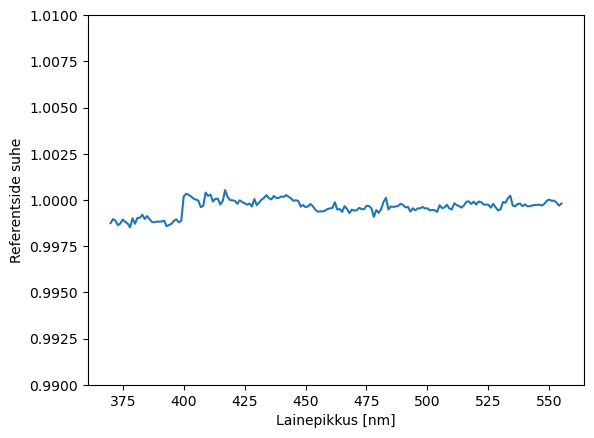

In [39]:
# Testimine töö käigus kui palju muutub referents signaal
if DEBUG:
    plt.plot(ref1_JohnsonB['Lainepikkus'], ref1_JohnsonB['Signaal'] / ref2_JohnsonB['Signaal'])
    #plt.plot(ref2['lainepikkus'], ref2['signaal'])
    plt.xlabel("Lainepikkus [nm]")
    plt.ylabel("Referentside suhe")
    plt.ylim([0.99, 1.01])
    plt.show()

filter_johnson_b.pdf


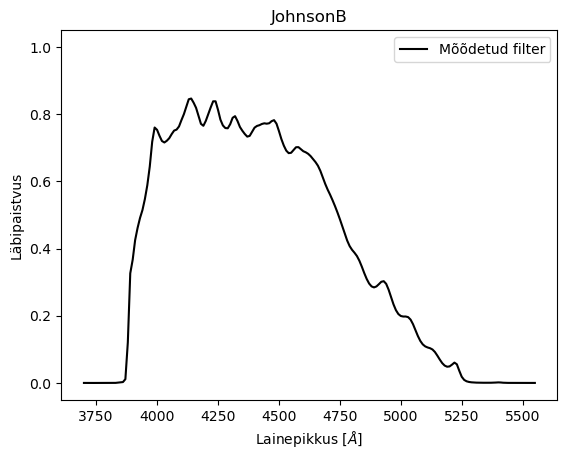

In [115]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_JohnsonB, pealkiri="JohnsonB", faili_nimi= "filter_johnson_b.pdf", tee_pdf=True)

## Johnson B filtrid mõõdetud ja standard kokku

In [85]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'Generic_Bessell.B.dat', skiprows=0, sep=' ',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_JohnsonB['Lainepikkus'] = standard_JohnsonB['Lainepikkus'] *10.0
if DEBUG:
    print(standard_JohnsonB['Lainepikkus'])

In [87]:
standard_JohnsonB['Lainepikkus'] = standard_JohnsonB['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_JohnsonB)

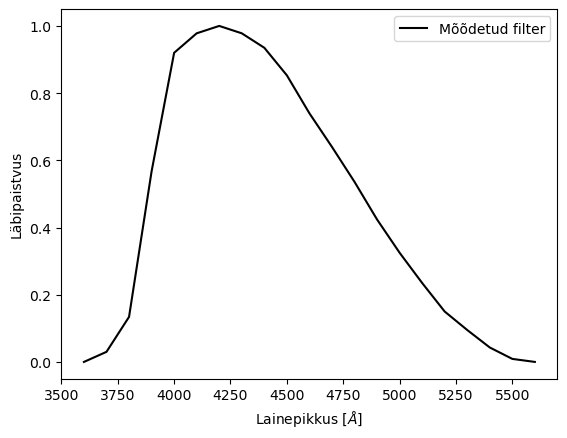

In [89]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(standard_JohnsonB)

In [81]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi ='B/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'B_19-27-47.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'ref1_B_19-11-34.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonB = pd.read_csv(kataloog + filtri_nimi + 'ref2_B_19-44-17.txt', skiprows=14, sep='\t', 
                 usecols=[0, 1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonB['Lainepikkus'] = filter_JohnsonB['Lainepikkus'] *10.0
# Läbipaistvus 1 ja Läbipaistvus 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_JohnsonB['Labipaistvus1'] = filter_JohnsonB['Signaal'] / ref1_JohnsonB['Signaal']
filter_JohnsonB['Labipaistvus2'] = filter_JohnsonB['Signaal'] / ref2_JohnsonB['Signaal']
if DEBUG:
    print(filter_JohnsonB) 

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2
0         3700.0 -0.000000e+00      -0.000000      -0.000000
1         3710.0 -7.000000e-07      -0.000091      -0.000091
2         3720.0 -8.000000e-07      -0.000100      -0.000100
3         3730.0 -1.000000e-06      -0.000121      -0.000120
4         3740.0 -8.000000e-07      -0.000093      -0.000093
..           ...           ...            ...            ...
181       5510.0  6.000000e-07       0.000004       0.000004
182       5520.0  5.000000e-07       0.000003       0.000003
183       5530.0  3.000000e-07       0.000002       0.000002
184       5540.0  2.000000e-07       0.000001       0.000001
185       5550.0  2.000000e-07       0.000001       0.000001

[186 rows x 4 columns]


filter_johnson_b_suur.pdf


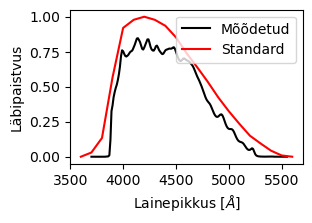

In [369]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_JohnsonB, standard_JohnsonB, faili_nimi="filter_johnson_b_suur.pdf", tee_pdf=True)

## Johnson B ülevaade, kiire mõõtmine

In [473]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiireJohnsonB= pd.read_csv(kataloog + filtri_nimi + 'B_full_15-15-37.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
vordlus1_kiireJohnsonB = pd.read_csv(kataloog + filtri_nimi + '23-39-26.txt', skiprows=12, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
vordlus2_kiireJohnsonB = pd.read_csv(kataloog + filtri_nimi + 'ref1_15-30-25.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
# Labipasitvus1 on kuidagi katki sest algne on sama nagu Labipasitvus2 aga see ei tööta nii nagu peab
filter_kiireJohnsonB['Labipaistvus1'] = vordlus2_kiireJohnsonB['Signaal'] / vordlus1_kiireJohnsonB['Signaal']
filter_kiireJohnsonB['Labipaistvus2'] = filter_kiireJohnsonB['Signaal'] / vordlus2_kiireJohnsonB['Signaal']
if DEBUG:
    print(filter_kiireJohnsonB['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [475]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiireJohnsonB['vordlus1'] = vordlus1_kiireJohnsonB['Signaal']
filter_kiireJohnsonB['vordlus2'] = vordlus2_kiireJohnsonB['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiireJohnsonB['suhe1'] = filter_kiireJohnsonB['Signaal'] / vordlus1_kiireJohnsonB['Signaal']
filter_kiireJohnsonB['suhe2'] = filter_kiireJohnsonB['Signaal'] / vordlus2_kiireJohnsonB['Signaal']
filter_kiireJohnsonB['Lainepikkus'] = filter_kiireJohnsonB['Lainepikkus'] *10.0
#kirjutan ascii faili
filter_kiireJohnsonB.to_csv("filtri_ulevaade_johnson_B.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiireJohnsonB)

     Lainepikkus   Signaal  Labipaistvus1  Labipaistvus2  vordlus1  \
0         3000.0  0.001302       0.000157    6508.500000  0.001277   
1         3010.0  0.001332      -0.000153   -6662.000000  0.001308   
2         3020.0  0.001365      -0.000523   -1950.285714  0.001340   
3         3030.0  0.001396      -0.000146   -6981.000000  0.001370   
4         3040.0  0.001427       0.000214    4757.666667  0.001401   
..           ...       ...            ...            ...       ...   
896      11960.0  0.000610       0.803186       1.259298  0.000603   
897      11970.0  0.000579       0.785689       1.285207  0.000573   
898      11980.0  0.000550       0.763583       1.321875  0.000545   
899      11990.0  0.000524       0.740262       1.363897  0.000519   
900      12000.0  0.000498       0.713098       1.415127  0.000493   

         vordlus2     suhe1        suhe2  
0    2.000000e-07  1.019502  6508.500000  
1   -2.000000e-07  1.018888 -6662.000000  
2   -7.000000e-07  1.019110 -1

filtri_ulevaade_johnson_b.pdf


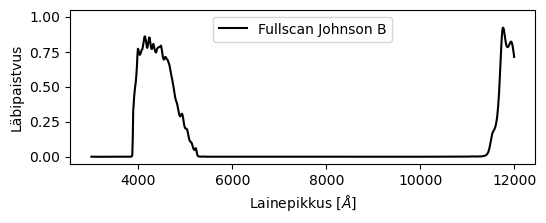

In [477]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiireJohnsonB, label="Fullscan Johnson B", faili_nimi="filtri_ulevaade_johnson_b.pdf", tee_pdf=True)

# Halpha ainult filter 

In [407]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Halpha/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_halpha = pd.read_csv(kataloog + filtri_nimi + 'Halpha_14-19-30.txt', skiprows=17, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_halpha = pd.read_csv(kataloog + filtri_nimi + 'ref1_Halpha_13-54-01.txt', skiprows=17, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_halpha = pd.read_csv(kataloog + filtri_nimi + 'ref2_Halpha_14-44-56.txt', skiprows=17, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_halpha['Labipaistvus1'] = filter_halpha['Signaal'] / ref1_halpha['Signaal']
filter_halpha['Labipaistvus2'] = filter_halpha['Signaal'] / ref2_halpha['Signaal']
if DEBUG:
    print(filter_halpha['Lainepikkus'])

0      645.0
1      645.1
2      645.2
3      645.3
4      645.4
       ...  
296    674.6
297    674.7
298    674.8
299    674.9
300    675.0
Name: Lainepikkus, Length: 301, dtype: float64


In [409]:
# Kopeerin referentside signaalid filtritabelisse
filter_halpha['ref1'] = ref1_halpha['Signaal']
filter_halpha['ref2'] = ref2_halpha['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_halpha['suhe1'] = filter_halpha['Signaal'] / ref1_halpha['Signaal']
filter_halpha['suhe2'] = filter_halpha['Signaal'] / ref2_halpha['Signaal']
filter_halpha['Lainepikkus'] = filter_halpha['Lainepikkus'] *10.0
filter_halpha.to_csv("filter_halpha.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_halpha)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         6450.0 -1.000000e-07      -0.000060      -0.000060  0.001655   
1         6451.0  0.000000e+00       0.000000       0.000000  0.001655   
2         6452.0  1.000000e-07       0.000060       0.000060  0.001654   
3         6453.0  0.000000e+00       0.000000       0.000000  0.001654   
4         6454.0 -1.000000e-07      -0.000060      -0.000060  0.001654   
..           ...           ...            ...            ...       ...   
296       6746.0  0.000000e+00       0.000000       0.000000  0.001561   
297       6747.0 -0.000000e+00      -0.000000      -0.000000  0.001561   
298       6748.0 -0.000000e+00      -0.000000      -0.000000  0.001561   
299       6749.0 -1.000000e-07      -0.000064      -0.000064  0.001562   
300       6750.0  0.000000e+00       0.000000       0.000000  0.001563   

         ref2     suhe1     suhe2  
0    0.001657 -0.000060 -0.000060  
1    0.001657  0.000000  0.000000  
2  

filter_halpha.pdf


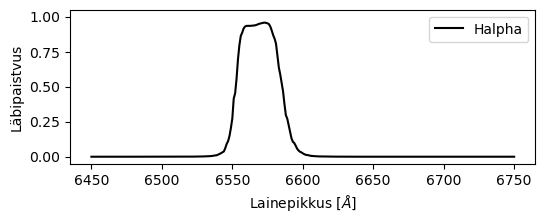

In [465]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_halpha, label="Halpha", faili_nimi="filter_halpha.pdf", tee_pdf=True)

## H_{alpha}ülevaade, kiire mõõtmine

In [563]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_halpha = pd.read_csv(kataloog + filtri_nimi + 'Halpha_full_17-13-27.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_halpha = pd.read_csv(kataloog + filtri_nimi + 'ref3_16-44-09.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_halpha = pd.read_csv(kataloog + filtri_nimi + 'ref4_17-27-54.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_halpha['Labipaistvus1'] = filter_kiire_halpha['Signaal'] / ref1_kiire_halpha['Signaal']
filter_halpha['Labipaistvus2'] = filter_kiire_halpha['Signaal'] / ref2_kiire_halpha['Signaal']
if DEBUG:
    print(filter_kiire_halpha['Lainepikkus'])


In [415]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_halpha['ref1'] = ref1_kiire_halpha['Signaal']
filter_kiire_halpha['ref2'] = ref2_kiire_halpha['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_halpha['suhe1'] = filter_kiire_halpha['Signaal'] / ref1_kiire_halpha['Signaal']
filter_kiire_halpha['suhe2'] = filter_kiire_halpha['Signaal'] / ref2_kiire_halpha['Signaal']
filter_kiire_halpha['Lainepikkus'] = filter_kiire_halpha['Lainepikkus'] *10.0
filter_kiire_halpha.to_csv("filter_ulevaade_halpha.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_halpha)

     Lainepikkus       Signaal  Labipaistvus1      ref1      ref2     suhe1  \
0         3000.0 -5.000000e-07      -0.000384  0.001303  0.001306 -0.000384   
1         3010.0  0.000000e+00       0.000000  0.001335  0.001336  0.000000   
2         3020.0  3.000000e-07       0.000219  0.001367  0.001369  0.000219   
3         3030.0 -2.000000e-07      -0.000143  0.001398  0.001400 -0.000143   
4         3040.0 -7.000000e-07      -0.000490  0.001429  0.001432 -0.000490   
..           ...           ...            ...       ...       ...       ...   
896      11960.0  2.719000e-04       0.445227  0.000611  0.000612  0.445227   
897      11970.0  2.340000e-04       0.403518  0.000580  0.000581  0.403518   
898      11980.0  1.989000e-04       0.360784  0.000551  0.000553  0.360784   
899      11990.0  1.731000e-04       0.329903  0.000525  0.000526  0.329903   
900      12000.0  1.580000e-04       0.316697  0.000499  0.000501  0.316697   

        suhe2  
0   -0.000383  
1    0.000000  
2  

filtri_ulevaade_halpha.pdf


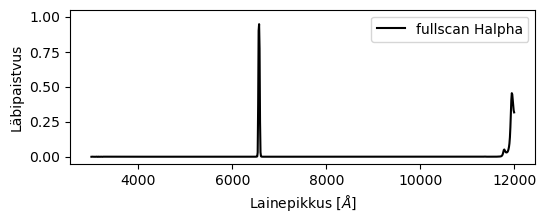

In [479]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_halpha, label="fullscan Halpha", faili_nimi="filtri_ulevaade_halpha.pdf", tee_pdf=True)

# $I_{c}$ - ainult filter

In [105]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Ic/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'Ic_23-43-43.txt', skiprows=23, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref1_Ic_22-59-38.txt', skiprows=23, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref2_Ic_00-27-50.txt', skiprows=23, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonIc['Labipaistvus1'] = filter_JohnsonIc['Signaal'] / ref1_JohnsonIc['Signaal']
filter_JohnsonIc['Labipaistvus2'] = filter_JohnsonIc['Signaal'] / ref2_JohnsonIc['Signaal']
if DEBUG:
    print(filter_JohnsonIc['Lainepikkus'])

0       675.0
1       676.0
2       677.0
3       678.0
4       679.0
        ...  
521    1196.0
522    1197.0
523    1198.0
524    1199.0
525    1200.0
Name: Lainepikkus, Length: 526, dtype: float64


In [133]:
# Kopeerin referentside signaalid filtritabelisse
filter_JohnsonIc['ref1'] = ref1_JohnsonIc['Signaal']
filter_JohnsonIc['ref2'] = ref2_JohnsonIc['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_JohnsonIc['suhe1'] = filter_JohnsonIc['Signaal'] / ref1_JohnsonIc['Signaal']
filter_JohnsonIc['suhe2'] = filter_JohnsonIc['Signaal'] / ref2_JohnsonIc['Signaal']
filter_JohnsonIc['Lainepikkus'] = filter_JohnsonIc['Lainepikkus'] *10.0
filter_JohnsonIc.to_csv("filter_Johnson_Ic.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_JohnsonIc)

     Lainepikkus   Signaal  Labipaistvus1  Labipaistvus2      ref1      ref2  \
0         6750.0  0.000012       0.000067       0.000067  0.175132  0.175533   
1         6760.0  0.000013       0.000072       0.000072  0.177719  0.178095   
2         6770.0  0.000014       0.000079       0.000079  0.180305  0.180715   
3         6780.0  0.000016       0.000088       0.000088  0.182410  0.182808   
4         6790.0  0.000018       0.000098       0.000097  0.184366  0.184766   
..           ...       ...            ...            ...       ...       ...   
521      11960.0  0.000089       0.152859       0.152885  0.000584  0.000584   
522      11970.0  0.000086       0.155107       0.155107  0.000555  0.000555   
523      11980.0  0.000083       0.157506       0.157536  0.000528  0.000527   
524      11990.0  0.000080       0.159729       0.159825  0.000502  0.000502   
525      12000.0  0.000077       0.162270       0.162440  0.000478  0.000477   

        suhe1     suhe2  
0    0.000067

filter_johnson_ic.pdf


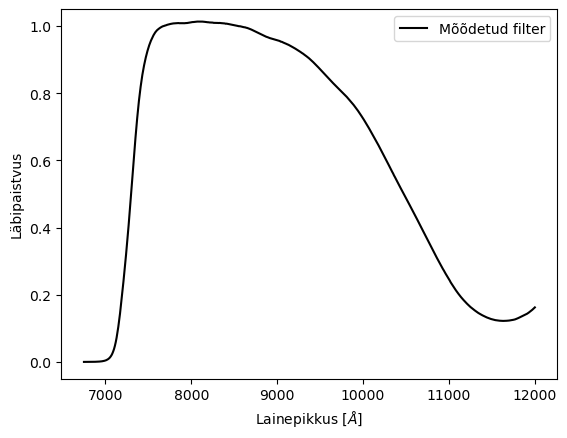

In [137]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_JohnsonIc, pealkiri="Johnson Ic", faili_nimi="filter_johnson_ic.pdf", tee_pdf=False)

## Johnson I filtrid mõõdetud ja standard kokku

In [123]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'Generic_Bessell.I.dat', skiprows=0, sep=' ',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_JohnsonIc['Lainepikkus'] = standard_JohnsonIc['Lainepikkus'] *10.0
if DEBUG:
    print(standard_JohnsonIc['Lainepikkus'])

In [125]:
standard_JohnsonIc['Lainepikkus'] = standard_JohnsonIc['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_JohnsonIc)

In [139]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Ic/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'Ic_23-43-43.txt', skiprows=23, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref1_Ic_22-59-38.txt', skiprows=23, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref2_Ic_00-27-50.txt', skiprows=23, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonIc['Lainepikkus'] = filter_JohnsonIc['Lainepikkus'] *10.0
filter_JohnsonIc['Labipaistvus1'] = filter_JohnsonIc['Signaal'] / ref1_JohnsonIc['Signaal']
filter_JohnsonIc['Labipaistvus2'] = filter_JohnsonIc['Signaal'] / ref2_JohnsonIc['Signaal']
if DEBUG:
    print(filter_JohnsonIc['Lainepikkus'])

0       6750.0
1       6760.0
2       6770.0
3       6780.0
4       6790.0
        ...   
521    11960.0
522    11970.0
523    11980.0
524    11990.0
525    12000.0
Name: Lainepikkus, Length: 526, dtype: float64


filter_johnson_ic.pdf


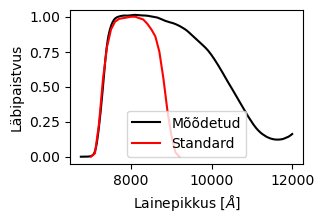

In [290]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_JohnsonIc, standard_JohnsonIc,faili_nimi="filter_johnson_ic.pdf", tee_pdf=True)

## Ic ülevaade, kiire mõõtmine

In [373]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'Ic_full_16-29-27.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref2_16-00-04.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_JohnsonIc = pd.read_csv(kataloog + filtri_nimi + 'ref3_16-44-09.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_JohnsonIc['Labipaistvus1'] = filter_kiire_JohnsonIc['Signaal'] / ref1_kiire_JohnsonIc['Signaal']
filter_kiire_JohnsonIc['Labipaistvus2'] = filter_kiire_JohnsonIc['Signaal'] / ref2_kiire_JohnsonIc['Signaal']
if DEBUG:
    print(filter_kiire_JohnsonIc['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [375]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_JohnsonIc['ref1'] = ref1_kiire_JohnsonIc['Signaal']
filter_kiire_JohnsonIc['ref2'] = ref2_kiire_JohnsonIc['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_JohnsonIc['suhe1'] = filter_kiire_JohnsonIc['Signaal'] / ref1_kiire_JohnsonIc['Signaal']
filter_kiire_JohnsonIc['suhe2'] = filter_kiire_JohnsonIc['Signaal'] / ref2_kiire_JohnsonIc['Signaal']
filter_kiire_JohnsonIc['Lainepikkus'] = filter_kiire_JohnsonIc['Lainepikkus'] *10.0
filter_kiire_JohnsonIc.to_csv("filtri_ulevaade_Johnson_Ic.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_JohnsonIc)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         3000.0  3.000000e-07       0.000230       0.000230  0.001302   
1         3010.0 -1.000000e-07      -0.000075      -0.000075  0.001334   
2         3020.0 -3.000000e-07      -0.000220      -0.000219  0.001366   
3         3030.0 -7.000000e-07      -0.000501      -0.000501  0.001397   
4         3040.0 -3.000000e-07      -0.000210      -0.000210  0.001428   
..           ...           ...            ...            ...       ...   
896      11960.0  9.290000e-05       0.152295       0.152121  0.000610   
897      11970.0  9.030000e-05       0.155770       0.155717  0.000580   
898      11980.0  8.740000e-05       0.158592       0.158534  0.000551   
899      11990.0  8.400000e-05       0.160000       0.160091  0.000525   
900      12000.0  8.090000e-05       0.162124       0.162157  0.000499   

         ref2     suhe1     suhe2  
0    0.001303  0.000230  0.000230  
1    0.001335 -0.000075 -0.000075  
2  

filtri_ulevaade_johnson_ic.pdf


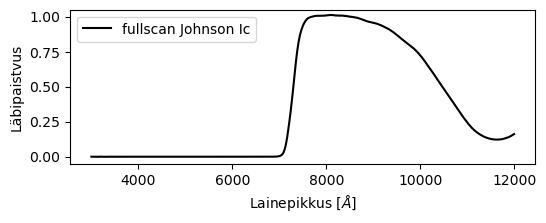

In [537]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_JohnsonIc, label="fullscan Johnson Ic", faili_nimi="filtri_ulevaade_johnson_ic.pdf", tee_pdf=True)

# Luminance - ainult filter

In [419]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Luminance/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_luminance = pd.read_csv(kataloog + filtri_nimi + 'Luminance_16-10-59.txt', skiprows=21, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_luminance = pd.read_csv(kataloog + filtri_nimi + 'ref1_Luminance_15-25-41.txt', skiprows=21, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_luminance = pd.read_csv(kataloog + filtri_nimi + 'ref2_Luminance_16-49-18.txt', skiprows=21, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_luminance['Labipaistvus1'] = filter_luminance['Signaal'] / ref1_luminance['Signaal']
filter_luminance['Labipaistvus2'] = filter_luminance['Signaal'] / ref2_luminance['Signaal']
if DEBUG:
    print(filter_luminance['Lainepikkus'])

0      351.0
1      352.0
2      353.0
3      354.0
4      355.0
       ...  
395    746.0
396    747.0
397    748.0
398    749.0
399    750.0
Name: Lainepikkus, Length: 400, dtype: float64
0      351.0
1      352.0
2      353.0
3      354.0
4      355.0
       ...  
395    746.0
396    747.0
397    748.0
398    749.0
399    750.0
Name: Lainepikkus, Length: 400, dtype: float64


In [421]:
# Kopeerin referentside signaalid filtritabelisse
filter_luminance['ref1'] = ref1_luminance['Signaal']
filter_luminance['ref2'] = ref2_luminance['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_luminance['suhe1'] = filter_luminance['Signaal'] / ref1_luminance['Signaal']
filter_luminance['suhe2'] = filter_luminance['Signaal'] / ref2_luminance['Signaal']
filter_luminance['Lainepikkus'] = filter_luminance['Lainepikkus'] *10.0
filter_luminance.to_csv("filter_luminance.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_luminance)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         3510.0 -7.000000e-07      -0.000192      -0.000192  0.003643   
1         3520.0 -8.000000e-07      -0.000211      -0.000210  0.003798   
2         3530.0 -9.000000e-07      -0.000227      -0.000227  0.003958   
3         3540.0 -8.000000e-07      -0.000194      -0.000194  0.004123   
4         3550.0 -8.000000e-07      -0.000186      -0.000186  0.004292   
..           ...           ...            ...            ...       ...   
395       7460.0  1.020000e-05       0.000063       0.000063  0.162437   
396       7470.0  9.700000e-06       0.000060       0.000060  0.161361   
397       7480.0  8.900000e-06       0.000056       0.000055  0.160289   
398       7490.0  8.500000e-06       0.000053       0.000053  0.159198   
399       7500.0  8.200000e-06       0.000052       0.000052  0.158125   

         ref2     suhe1     suhe2  
0    0.003648 -0.000192 -0.000192  
1    0.003804 -0.000211 -0.000210  
2  

filter_luminance.pdf


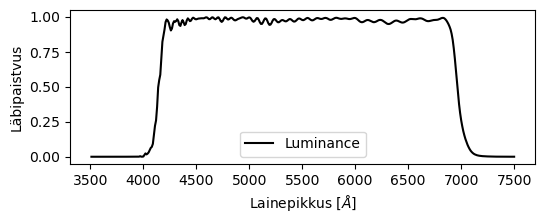

In [467]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_luminance, label="Luminance", faili_nimi="filter_luminance.pdf", tee_pdf=True)

## Luminance ülevaade, kiire mõõtmine

In [425]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_luminance_kiire = pd.read_csv(kataloog + filtri_nimi + 'Luminance_full_19-26-10.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_luminance_kiire = pd.read_csv(kataloog + filtri_nimi + 'ref6_18-56-46.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_luminance_kiire = pd.read_csv(kataloog + filtri_nimi + 'ref7_19-40-51.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_luminance_kiire['Labipaistvus1'] = filter_luminance_kiire['Signaal'] / ref1_luminance_kiire['Signaal']
filter_luminance_kiire['Labipaistvus2'] = filter_luminance_kiire['Signaal'] / ref2_luminance_kiire['Signaal']
if DEBUG:
    print(filter_luminance_kiire['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [427]:
# Kopeerin referentside signaalid filtritabelisse
filter_luminance_kiire['ref1'] = ref1_luminance_kiire['Signaal']
filter_luminance_kiire['ref2'] = ref2_luminance_kiire['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_luminance_kiire['suhe1'] = filter_luminance_kiire['Signaal'] / ref1_luminance_kiire['Signaal']
filter_luminance_kiire['suhe2'] = filter_luminance_kiire['Signaal'] / ref2_luminance_kiire['Signaal']
filter_luminance_kiire['Lainepikkus'] = filter_luminance_kiire['Lainepikkus'] *10.0
filter_luminance_kiire.to_csv("filtri_ulevaade_luminance.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_luminance_kiire)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         3000.0 -5.000000e-07      -0.000382      -0.000382  0.001308   
1         3010.0 -1.000000e-06      -0.000746      -0.000746  0.001340   
2         3020.0 -7.000000e-07      -0.000510      -0.000510  0.001372   
3         3030.0 -2.000000e-07      -0.000143      -0.000142  0.001402   
4         3040.0 -4.000000e-07      -0.000279      -0.000278  0.001434   
..           ...           ...            ...            ...       ...   
896      11960.0  4.422000e-04       0.723140       0.721253  0.000611   
897      11970.0  4.193000e-04       0.721563       0.719828  0.000581   
898      11980.0  3.869000e-04       0.700652       0.697997  0.000552   
899      11990.0  3.480000e-04       0.662479       0.659841  0.000525   
900      12000.0  3.050000e-04       0.610855       0.609147  0.000499   

         ref2     suhe1     suhe2  
0    0.001309 -0.000382 -0.000382  
1    0.001341 -0.000746 -0.000746  
2  

filtri_ulevaade_luminance.pdf


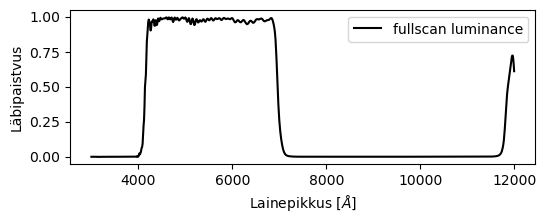

In [483]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_luminance_kiire, label="fullscan luminance",faili_nimi="filtri_ulevaade_luminance.pdf", tee_pdf=True)

# Rc ainult filter

In [143]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Rc/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'Rc_21-46-30.txt', skiprows=18, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'ref1_Rc_21-18-53.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'ref2_Rc_22-14-47.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonRc['Labipaistvus1'] = filter_JohnsonRc['Signaal'] / ref1_JohnsonRc['Signaal']
filter_JohnsonRc['Labipaistvus2'] = filter_JohnsonRc['Signaal'] / ref2_JohnsonRc['Signaal']
if DEBUG:
    print(filter_JohnsonRc['Lainepikkus'])

0      525.0
1      526.0
2      527.0
3      528.0
4      529.0
       ...  
321    846.0
322    847.0
323    848.0
324    849.0
325    850.0
Name: Lainepikkus, Length: 326, dtype: float64


In [145]:
# Kopeerin referentside signaalid filtritabelisse
filter_JohnsonRc['ref1'] = ref1_JohnsonRc['Signaal']
filter_JohnsonRc['ref2'] = ref2_JohnsonRc['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_JohnsonRc['suhe1'] = filter_JohnsonRc['Signaal'] / ref1_JohnsonRc['Signaal']
filter_JohnsonRc['suhe2'] = filter_JohnsonRc['Signaal'] / ref2_JohnsonRc['Signaal']
filter_JohnsonRc['Lainepikkus'] = filter_JohnsonRc['Lainepikkus'] *10.0
filter_JohnsonRc.to_csv("filter_Johnson_Rc.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_JohnsonRc)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         5250.0 -1.000000e-07  -7.112406e-07  -7.097121e-07  0.140599   
1         5260.0 -9.000000e-07  -6.359193e-06  -6.348266e-06  0.141527   
2         5270.0 -8.000000e-07  -5.616952e-06  -5.607546e-06  0.142426   
3         5280.0 -9.000000e-07  -6.280338e-06  -6.270252e-06  0.143304   
4         5290.0 -9.000000e-07  -6.243215e-06  -6.231647e-06  0.144156   
..           ...           ...            ...            ...       ...   
321       8460.0  4.170000e-05   4.201384e-04   4.197456e-04  0.099253   
322       8470.0  4.580000e-05   4.598615e-04   4.595750e-04  0.099595   
323       8480.0  5.170000e-05   5.174310e-04   5.170657e-04  0.099917   
324       8490.0  6.030000e-05   6.014621e-04   6.009538e-04  0.100256   
325       8500.0  7.200000e-05   7.152543e-04   7.147644e-04  0.100664   

         ref2         suhe1         suhe2  
0    0.140902 -7.112406e-07 -7.097121e-07  
1    0.141771 -6.359193

filter_Johnson_Rc.pdf


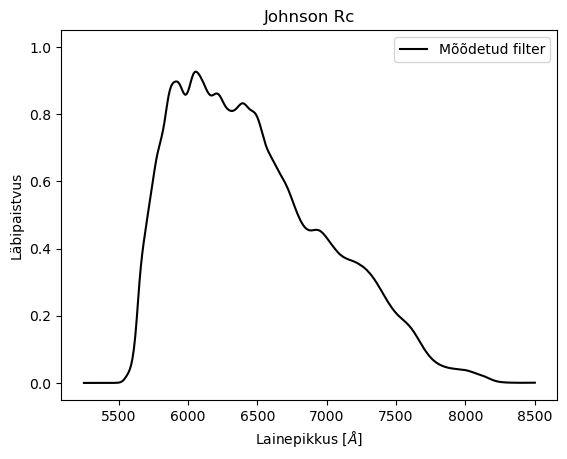

In [482]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_JohnsonRc, pealkiri="Johnson Rc", faili_nimi="filter_Johnson_Rc.pdf", tee_pdf=True)

## Johnson R filtrid mõõdetud ja standard kokku

In [151]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'Generic_Bessell.R.dat', skiprows=0, sep=' ',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_JohnsonRc['Lainepikkus'] = standard_JohnsonRc['Lainepikkus'] *10.0
if DEBUG:
    print(standard_JohnsonRc['Lainepikkus'])

In [153]:
standard_JohnsonRc['Lainepikkus'] = standard_JohnsonRc['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_JohnsonRc)

In [157]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Rc/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'Rc_21-46-30.txt', skiprows=18, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonrRc = pd.read_csv(kataloog + filtri_nimi + 'ref1_Rc_21-18-53.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonrRc = pd.read_csv(kataloog + filtri_nimi + 'ref2_Rc_22-14-47.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonRc['Lainepikkus'] = filter_JohnsonRc['Lainepikkus'] *10.0
filter_JohnsonRc['Labipaistvus1'] = filter_JohnsonRc['Signaal'] / ref1_JohnsonRc['Signaal']
filter_JohnsonRc['Labipaistvus2'] = filter_JohnsonRc['Signaal'] / ref2_JohnsonRc['Signaal']
if DEBUG:
    print(filter_JohnsonRc['Lainepikkus'])

0      5250.0
1      5260.0
2      5270.0
3      5280.0
4      5290.0
        ...  
321    8460.0
322    8470.0
323    8480.0
324    8490.0
325    8500.0
Name: Lainepikkus, Length: 326, dtype: float64


filter_johnson_rc.pdf


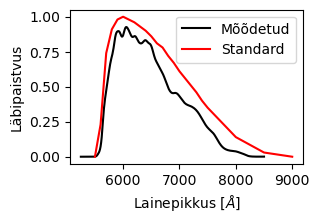

In [292]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_JohnsonRc, standard_JohnsonRc, faili_nimi="filter_johnson_rc.pdf", tee_pdf=True)

## Rc ülevaade, kiire mõõtmine

In [485]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'Rc_full_16-14-50.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'ref2_16-00-04.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_JohnsonRc = pd.read_csv(kataloog + filtri_nimi + 'ref3_16-44-09.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_JohnsonRc['Labipaistvus1'] = filter_kiire_JohnsonRc['Signaal'] / ref1_kiire_JohnsonRc['Signaal']
filter_kiire_JohnsonRc['Labipaistvus2'] = filter_kiire_JohnsonRc['Signaal'] / ref2_kiire_JohnsonRc['Signaal']
if DEBUG:
    print(filter_kiire_JohnsonRc['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [487]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_JohnsonRc['ref1'] = ref1_kiire_JohnsonRc['Signaal']
filter_kiire_JohnsonRc['ref2'] = ref2_kiire_JohnsonRc['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_JohnsonRc['suhe1'] = filter_kiire_JohnsonRc['Signaal'] / ref1_kiire_JohnsonRc['Signaal']
filter_kiire_JohnsonRc['suhe2'] = filter_kiire_JohnsonRc['Signaal'] / ref2_kiire_JohnsonRc['Signaal']
filter_kiire_JohnsonRc['Lainepikkus'] = filter_kiire_JohnsonRc['Lainepikkus'] *10.0
filter_kiire_JohnsonRc.to_csv("filtri_ulevaade_Johnson_Rc.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_JohnsonRc)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         3000.0 -9.000000e-07      -0.000691      -0.000691  0.001302   
1         3010.0 -4.000000e-07      -0.000300      -0.000300  0.001334   
2         3020.0  1.000000e-07       0.000073       0.000073  0.001366   
3         3030.0 -3.000000e-07      -0.000215      -0.000215  0.001397   
4         3040.0 -6.000000e-07      -0.000420      -0.000420  0.001428   
..           ...           ...            ...            ...       ...   
896      11960.0 -1.000000e-07      -0.000164      -0.000164  0.000610   
897      11970.0 -5.000000e-07      -0.000863      -0.000862  0.000580   
898      11980.0 -6.000000e-07      -0.001089      -0.001088  0.000551   
899      11990.0 -4.000000e-07      -0.000762      -0.000762  0.000525   
900      12000.0  0.000000e+00       0.000000       0.000000  0.000499   

         ref2     suhe1     suhe2  
0    0.001303 -0.000691 -0.000691  
1    0.001335 -0.000300 -0.000300  
2  

filtri_ulevaade_johnson_rc.pdf


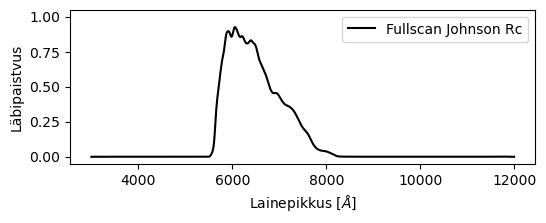

In [533]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_JohnsonRc, label="Fullscan Johnson Rc", faili_nimi="filtri_ulevaade_johnson_rc.pdf", tee_pdf=True)

# Johnson V ainult filter

In [161]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'V/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_JohnsonV = pd.read_csv(kataloog + filtri_nimi + 'V_20-29-28.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_JohnsonV = pd.read_csv(kataloog + filtri_nimi + 'ref1_V_20-08-02.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_JohnsonV = pd.read_csv(kataloog + filtri_nimi + 'ref2_V_20-50-45.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_JohnsonV['Labipaistvus1'] = filter_JohnsonV['Signaal'] / ref1_JohnsonV['Signaal']
filter_JohnsonV['Labipaistvus2'] = filter_JohnsonV['Signaal'] / ref2_JohnsonV['Signaal']
if DEBUG:
    print(filter_JohnsonV['Lainepikkus'])

0      450.0
1      451.0
2      452.0
3      453.0
4      454.0
       ...  
246    696.0
247    697.0
248    698.0
249    699.0
250    700.0
Name: Lainepikkus, Length: 251, dtype: float64


In [163]:
# Kopeerin referentside signaalid filtritabelisse
filter_JohnsonV['ref1'] = ref1_JohnsonV['Signaal']
filter_JohnsonV['ref2'] = ref2_JohnsonV['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_JohnsonV['suhe1'] = filter_JohnsonV['Signaal'] / ref1_JohnsonV['Signaal']
filter_JohnsonV['suhe2'] = filter_JohnsonV['Signaal'] / ref2_JohnsonV['Signaal']
filter_JohnsonV_angstrom=filter_JohnsonV
filter_JohnsonV_angstrom['Lainepikkus'] = filter_JohnsonV_angstrom['Lainepikkus'] *10.0
filter_JohnsonV_angstrom.to_csv("filter_Johnson_V.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_JohnsonV)

     Lainepikkus       Signaal  Labipaistvus1  Labipaistvus2      ref1  \
0         4500.0 -2.000000e-07      -0.000004      -0.000004  0.049444   
1         4510.0 -8.000000e-07      -0.000016      -0.000016  0.050031   
2         4520.0 -9.000000e-07      -0.000018      -0.000018  0.050699   
3         4530.0 -1.000000e-06      -0.000019      -0.000019  0.051517   
4         4540.0 -9.000000e-07      -0.000017      -0.000017  0.052383   
..           ...           ...            ...            ...       ...   
246       6960.0  4.200000e-06       0.000021       0.000021  0.198117   
247       6970.0  3.600000e-06       0.000018       0.000018  0.198127   
248       6980.0  3.100000e-06       0.000016       0.000016  0.198108   
249       6990.0  2.700000e-06       0.000014       0.000014  0.197985   
250       7000.0  2.400000e-06       0.000012       0.000012  0.194577   

         ref2     suhe1     suhe2  
0    0.049484 -0.000004 -0.000004  
1    0.050065 -0.000016 -0.000016  
2  

filter_johnson_v.pdf


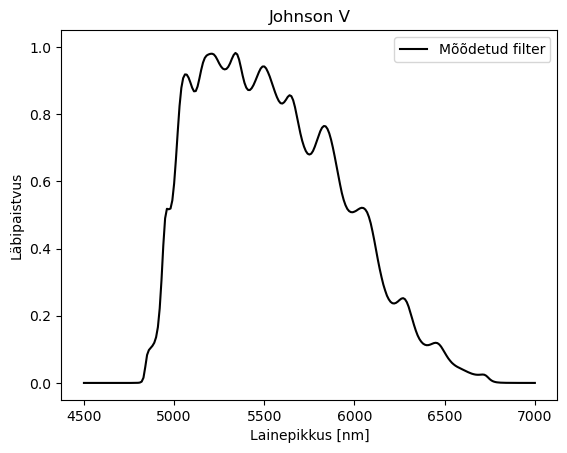

In [323]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_JohnsonV, pealkiri="Johnson V", faili_nimi="filter_johnson_v.pdf", tee_pdf=True)

## Johnson V filtrid mõõdetud ja standard kokku

In [167]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_Johnsonv = pd.read_csv(kataloog + filtri_nimi + 'Generic_Bessell.V.dat', skiprows=0, sep=' ',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_Johnsonv['Lainepikkus'] = standard_Johnsonv['Lainepikkus'] *10.0
if DEBUG:
    print(standard_Johnsonv['Lainepikkus'])

In [169]:
standard_Johnsonv['Lainepikkus'] = standard_Johnsonv['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_Johnsonv)

In [173]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'V/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_Johnsonv = pd.read_csv(kataloog + filtri_nimi + 'V_20-29-28.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_Johnsonv = pd.read_csv(kataloog + filtri_nimi + 'ref1_V_20-08-02.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_Johnsonv = pd.read_csv(kataloog + filtri_nimi + 'ref2_V_20-50-45.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_Johnsonv['Lainepikkus'] = filter_Johnsonv['Lainepikkus'] *10.0
filter_Johnsonv['Labipaistvus1'] = filter_Johnsonv['Signaal'] / ref1_Johnsonv['Signaal']
filter_Johnsonv['Labipaistvus2'] = filter_Johnsonv['Signaal'] / ref2_Johnsonv['Signaal']
if DEBUG:
    print(filter_Johnsonv['Lainepikkus'])

0      4500.0
1      4510.0
2      4520.0
3      4530.0
4      4540.0
        ...  
246    6960.0
247    6970.0
248    6980.0
249    6990.0
250    7000.0
Name: Lainepikkus, Length: 251, dtype: float64


filter_johnson_v.pdf


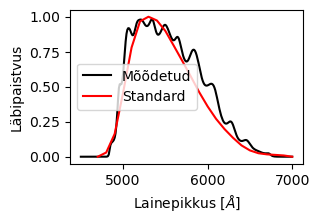

In [294]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_Johnsonv, standard_Johnsonv, faili_nimi="filter_johnson_v.pdf", tee_pdf=True)

## Johnson V ülevaade, kiire mõõtmine

In [491]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_fullV = pd.read_csv(kataloog + filtri_nimi + 'V_full_15-45-31.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_fullV = pd.read_csv(kataloog + filtri_nimi + 'ref1_15-30-25.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_fullV = pd.read_csv(kataloog + filtri_nimi + 'ref2_16-00-04.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
# Labipasitvus1 peaks olema Labipasitvus2
filter_fullV['Labipaistvus2'] = filter_fullV['Signaal'] / ref1_fullV['Signaal']
filter_fullV['Labipaistvus1'] = filter_fullV['Signaal'] / ref2_fullV['Signaal']
if DEBUG:
    print(filter_fullV['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [493]:
# Kopeerin referentside signaalid filtritabelisse
filter_fullV['ref1'] = ref1_fullV['Signaal']
filter_fullV['ref2'] = ref2_fullV['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_fullV['suhe1'] = filter_fullV['Signaal'] / ref1_fullV['Signaal']
filter_fullV['suhe2'] = filter_fullV['Signaal'] / ref2_fullV['Signaal']
filter_fullV['Lainepikkus'] = filter_fullV['Lainepikkus'] *10.0
filter_fullV.to_csv("filtri_ulevaade_johnsonV.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_fullV[100:200])

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
100       4000.0 -1.000000e-07      -0.000007      -0.000006  0.013645   
101       4010.0 -6.000000e-07      -0.000044      -0.000032  0.013780   
102       4020.0 -1.100000e-06      -0.000079      -0.000057  0.013969   
103       4030.0 -7.000000e-07      -0.000049      -0.000035  0.014370   
104       4040.0 -5.000000e-07      -0.000033      -0.000024  0.014957   
..           ...           ...            ...            ...       ...   
195       4950.0  5.693620e-02       1.767376       0.489644  0.032215   
196       4960.0  6.084810e-02       2.031344       0.518051  0.029955   
197       4970.0  6.127370e-02       2.212111       0.516530  0.027699   
198       4980.0  6.214980e-02       2.399217       0.518884  0.025904   
199       4990.0  6.569890e-02       2.652272       0.543298  0.024771   

         ref2     suhe1     suhe2  
100  0.018105 -0.000007 -0.000006  
101  0.018736 -0.000044 -0.000032  
102

filtri_ulevaade_johnson_v.pdf


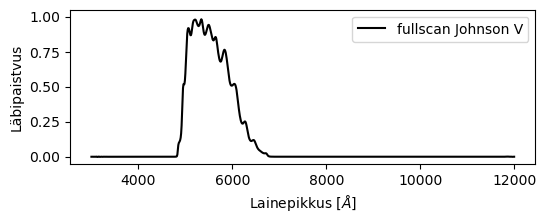

In [495]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_fullV, label="fullscan Johnson V",faili_nimi="filtri_ulevaade_johnson_v.pdf", tee_pdf=True)
#filtri_joonis(filter_fullV, pealkiri="Johnson V", faili_nimi="filtri_ulevaade_johnson_v.pdf", tee_pdf=True)

# exoBB lihtsalt filter

In [431]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'exoBB/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_exoBB = pd.read_csv(kataloog + filtri_nimi + 'exoBB_01-24-58.txt', skiprows=18, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_exoBB = pd.read_csv(kataloog + filtri_nimi + 'ref1_exoBB_00-56-45.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_exoBB = pd.read_csv(kataloog + filtri_nimi + 'ref2_exoBB_01-53-01.txt', skiprows=18, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_exoBB['Labipaistvus2'] = filter_exoBB['Signaal'] / ref1_exoBB['Signaal']
filter_exoBB['Labipaistvus1'] = filter_exoBB['Signaal'] / ref2_exoBB['Signaal']
if DEBUG:
    print(filter_exoBB['Lainepikkus'])

0       450.0
1       451.0
2       452.0
3       453.0
4       454.0
        ...  
746    1196.0
747    1197.0
748    1198.0
749    1199.0
750    1200.0
Name: Lainepikkus, Length: 751, dtype: float64


In [433]:
# Kopeerin referentside signaalid filtritabelisse
filter_exoBB['ref1'] = ref1_exoBB['Signaal']
filter_exoBB['ref2'] = ref2_exoBB['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_exoBB['suhe1'] = filter_exoBB['Signaal'] / ref1_exoBB['Signaal']
filter_exoBB['suhe2'] = filter_exoBB['Signaal'] / ref2_exoBB['Signaal']
filter_exoBB['Lainepikkus'] = filter_exoBB['Lainepikkus'] *10.0
filter_exoBB.to_csv("filter_exobb.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_exoBB)

     Lainepikkus   Signaal  Labipaistvus2  Labipaistvus1      ref1      ref2  \
0         4500.0  0.000017       0.000341       0.000341  0.049813  0.049873   
1         4510.0  0.000017       0.000327       0.000327  0.050417  0.050461   
2         4520.0  0.000017       0.000337       0.000336  0.051096  0.051149   
3         4530.0  0.000017       0.000327       0.000327  0.051916  0.051964   
4         4540.0  0.000018       0.000337       0.000337  0.052784  0.052850   
..           ...       ...            ...            ...       ...       ...   
746      11960.0  0.000519       0.886647       0.885436  0.000585  0.000586   
747      11970.0  0.000493       0.888369       0.885658  0.000555  0.000557   
748      11980.0  0.000469       0.887164       0.885488  0.000528  0.000529   
749      11990.0  0.000447       0.889486       0.887542  0.000502  0.000503   
750      12000.0  0.000424       0.887238       0.884832  0.000478  0.000479   

        suhe1     suhe2  
0    0.000341

filter_exobb.pdf


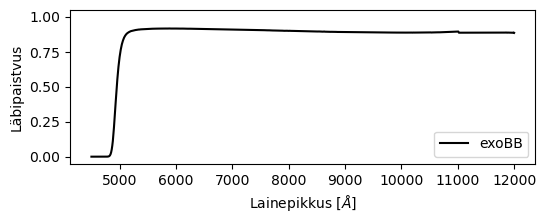

In [457]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_exoBB, label="exoBB", faili_nimi="filter_exobb.pdf", tee_pdf=True)

## exoBB ülevaade, kiire mõõtmine

In [400]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_exoBB = pd.read_csv(kataloog + filtri_nimi + 'exoBB_full_16-58-45.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_exoBB = pd.read_csv(kataloog + filtri_nimi + 'ref3_16-44-09.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_exoBB = pd.read_csv(kataloog + filtri_nimi + 'ref4_17-27-54.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_exoBB['Labipaistvus2'] = filter_kiire_exoBB['Signaal'] / ref1_kiire_exoBB['Signaal']
filter_kiire_exoBB['Labipaistvus1'] = filter_kiire_exoBB['Signaal'] / ref2_kiire_exoBB['Signaal']
if DEBUG:
    print(filter_kiire_exoBB['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [402]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_exoBB['ref1'] = ref1_kiire_exoBB['Signaal']
filter_kiire_exoBB['ref2'] = ref2_kiire_exoBB['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_exoBB['suhe1'] = filter_kiire_exoBB['Signaal'] / ref1_kiire_exoBB['Signaal']
filter_kiire_exoBB['suhe2'] = filter_kiire_exoBB['Signaal'] / ref2_kiire_exoBB['Signaal']
filter_kiire_exoBB['Lainepikkus'] = filter_kiire_exoBB['Lainepikkus'] *10.0
filter_kiire_exoBB.to_csv("filtri_ulevaade_exobb.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_exoBB)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0 -4.000000e-07      -0.000307      -0.000306  0.001303   
1         3010.0 -2.000000e-07      -0.000150      -0.000150  0.001335   
2         3020.0 -5.000000e-07      -0.000366      -0.000365  0.001367   
3         3030.0 -6.000000e-07      -0.000429      -0.000428  0.001398   
4         3040.0  1.000000e-07       0.000070       0.000070  0.001429   
..           ...           ...            ...            ...       ...   
896      11960.0  5.417000e-04       0.887015       0.884697  0.000611   
897      11970.0  5.150000e-04       0.888084       0.885793  0.000580   
898      11980.0  4.890000e-04       0.886994       0.884268  0.000551   
899      11990.0  4.654000e-04       0.886983       0.883951  0.000525   
900      12000.0  4.431000e-04       0.888154       0.884961  0.000499   

         ref2     suhe1     suhe2  
0    0.001306 -0.000307 -0.000306  
1    0.001336 -0.000150 -0.000150  
2  

filtri_ulevaade_exobb.pdf


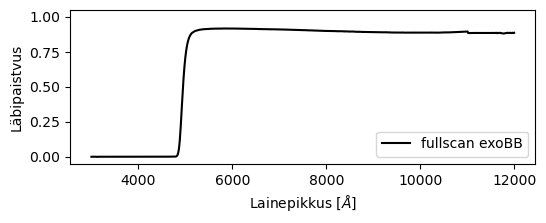

In [497]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_exoBB, label="fullscan exoBB", faili_nimi="filtri_ulevaade_exobb.pdf", tee_pdf=True)

# SLOANi filtrid

# SLOANi u

## SLOAN-i u lihtsalt filter

In [179]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'u/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_sloanu = pd.read_csv(kataloog + filtri_nimi + 'u_21-51-58.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_sloanu = pd.read_csv(kataloog + filtri_nimi + 'ref1_u_21-30-57.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_sloanu = pd.read_csv(kataloog + filtri_nimi + 'ref2_u_22-16-50.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_sloanu['Labipaistvus2'] = filter_sloanu['Signaal'] / ref1_sloanu['Signaal']
filter_sloanu['Labipaistvus1'] = filter_sloanu['Signaal'] / ref2_sloanu['Signaal']
if DEBUG:
    print(filter_sloanu['Lainepikkus'])

0      300.0
1      301.0
2      302.0
3      303.0
4      304.0
       ...  
116    416.0
117    417.0
118    418.0
119    419.0
120    420.0
Name: Lainepikkus, Length: 121, dtype: float64


In [181]:
# Kopeerin referentside signaalid filtritabelisse
filter_sloanu['ref1'] = ref1_sloanu['Signaal']
filter_sloanu['ref2'] = ref2_sloanu['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_sloanu['suhe1'] = filter_sloanu['Signaal'] / ref1_sloanu['Signaal']
filter_sloanu['suhe2'] = filter_sloanu['Signaal'] / ref2_sloanu['Signaal']
filter_sloanu['Lainepikkus'] = filter_sloanu['Lainepikkus'] *10.0
filter_sloanu.to_csv("filter_sloan_u.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_sloanu)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0  6.000000e-07       0.000471       0.000471  0.001273   
1         3010.0  4.000000e-07       0.000307       0.000306  0.001304   
2         3020.0 -6.000000e-07      -0.000449      -0.000449  0.001336   
3         3030.0 -7.000000e-07      -0.000513      -0.000512  0.001366   
4         3040.0 -6.000000e-07      -0.000430      -0.000429  0.001397   
..           ...           ...            ...            ...       ...   
116       4160.0  0.000000e+00       0.000000       0.000000  0.030150   
117       4170.0  1.000000e-07       0.000003       0.000003  0.031011   
118       4180.0  0.000000e+00       0.000000       0.000000  0.031867   
119       4190.0 -1.000000e-07      -0.000003      -0.000003  0.032752   
120       4200.0 -0.000000e+00      -0.000000      -0.000000  0.033632   

         ref2     suhe1     suhe2  
0    0.001275  0.000471  0.000471  
1    0.001306  0.000307  0.000306  
2  

filter_sloan_u.pdf


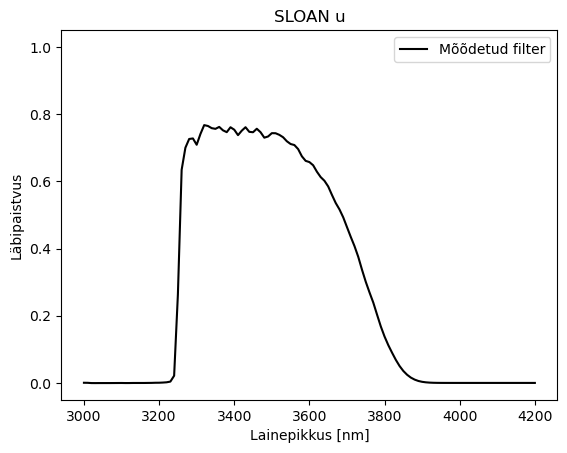

In [372]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_sloanu, pealkiri="SLOAN u", faili_nimi="filter_sloan_u.pdf", tee_pdf=True)

## SLOANi u filtrid standard ja mõõdetud kokku

In [185]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_SDSSu = pd.read_csv(kataloog + filtri_nimi + 'SLOAN_SDSS.uprime_filter.dat', skiprows=0, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_SDSSu['Lainepikkus'] = standard_SDSSu['Lainepikkus'] *10.0
if DEBUG:
    print(standard_SDSSu['Lainepikkus'])

In [187]:
standard_SDSSu['Lainepikkus'] = standard_SDSSu['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_SDSSu)

In [191]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'u/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_SDSSu = pd.read_csv(kataloog + filtri_nimi + 'u_21-51-58.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_SDSSu = pd.read_csv(kataloog + filtri_nimi + 'ref1_u_21-30-57.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_SDSSu = pd.read_csv(kataloog + filtri_nimi + 'ref2_u_22-16-50.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_SDSSu['Lainepikkus'] = filter_SDSSu['Lainepikkus'] *10.0
filter_SDSSu['Labipaistvus1'] = filter_SDSSu['Signaal'] / ref1_SDSSu['Signaal']
filter_SDSSu['Labipaistvus2'] = filter_SDSSu['Signaal'] / ref2_SDSSu['Signaal']
if DEBUG:
    print(filter_SDSSu['Lainepikkus'])

0      3000.0
1      3010.0
2      3020.0
3      3030.0
4      3040.0
        ...  
116    4160.0
117    4170.0
118    4180.0
119    4190.0
120    4200.0
Name: Lainepikkus, Length: 121, dtype: float64


 filter_sloan_u.pdf


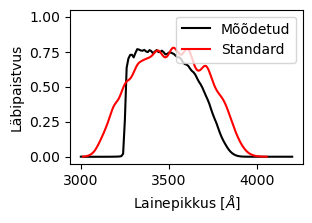

In [296]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_SDSSu, standard_SDSSu, faili_nimi=" filter_sloan_u.pdf", tee_pdf=True)

## SLOAN-i u ülevaade, kiire mõõtmine

In [499]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_sloanu = pd.read_csv(kataloog + filtri_nimi + 'u_full_17-42-58.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_sloanu = pd.read_csv(kataloog + filtri_nimi + 'ref4_17-27-54.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_sloanu = pd.read_csv(kataloog + filtri_nimi + 'ref5_18-12-34.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_sloanu['Labipaistvus2'] = filter_kiire_sloanu['Signaal'] / ref1_kiire_sloanu['Signaal']
filter_kiire_sloanu['Labipaistvus1'] = filter_kiire_sloanu['Signaal'] / ref2_kiire_sloanu['Signaal']
if DEBUG:
    print(filter_kiire_sloanu['Lainepikkus'])

In [501]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_sloanu['ref1'] = ref1_kiire_sloanu['Signaal']
filter_kiire_sloanu['ref2'] = ref2_kiire_sloanu['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_sloanu['suhe1'] = filter_kiire_sloanu['Signaal'] / ref1_kiire_sloanu['Signaal']
filter_kiire_sloanu['suhe2'] = filter_kiire_sloanu['Signaal'] / ref2_kiire_sloanu['Signaal']
filter_kiire_sloanu['Lainepikkus'] = filter_kiire_sloanu['Lainepikkus'] *10.0
filter_kiire_sloanu.to_csv("filtri_ulevaade_sloan_u.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_sloanu)

filtri_ulevaade_sloan_u.pdf


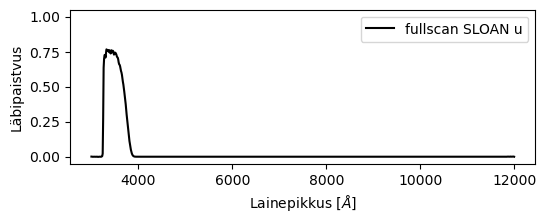

In [503]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_sloanu, label="fullscan SLOAN u", faili_nimi="filtri_ulevaade_sloan_u.pdf", tee_pdf=True)

# SLOANi g

## SLOAN-i g lihtsalt filter

In [195]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'g/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_sloang = pd.read_csv(kataloog + filtri_nimi + 'g_20-50-49.txt', skiprows=15, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_sloang = pd.read_csv(kataloog + filtri_nimi + 'ref1_g_20-31-02.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_sloang = pd.read_csv(kataloog + filtri_nimi + 'ref2_g_21-09-39.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_sloang['Labipaistvus2'] = filter_sloang['Signaal'] / ref1_sloang['Signaal']
filter_sloang['Labipaistvus1'] = filter_sloang['Signaal'] / ref2_sloang['Signaal']
if DEBUG:
    print(filter_sloang['Lainepikkus'])

0      380.0
1      381.0
2      382.0
3      383.0
4      384.0
       ...  
216    596.0
217    597.0
218    598.0
219    599.0
220    600.0
Name: Lainepikkus, Length: 221, dtype: float64


In [197]:
# Kopeerin referentside signaalid filtritabelisse
filter_sloang['ref1'] = ref1_sloang['Signaal']
filter_sloang['ref2'] = ref2_sloang['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_sloang['suhe1'] = filter_sloang['Signaal'] / ref1_sloang['Signaal']
filter_sloang['suhe2'] = filter_sloang['Signaal'] / ref2_sloang['Signaal']
filter_sloang['Lainepikkus'] = filter_sloang['Lainepikkus'] *10.0
filter_sloang.to_csv("filter_sloan_g.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_sloang)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3800.0 -1.000000e-07      -0.000009      -0.000009  0.011154   
1         3810.0 -7.000000e-07      -0.000060      -0.000060  0.011581   
2         3820.0 -7.000000e-07      -0.000058      -0.000058  0.011994   
3         3830.0 -8.000000e-07      -0.000064      -0.000064  0.012429   
4         3840.0 -8.000000e-07      -0.000062      -0.000062  0.012867   
..           ...           ...            ...            ...       ...   
216       5960.0  5.800000e-06       0.000031       0.000031  0.188411   
217       5970.0  5.100000e-06       0.000027       0.000027  0.188654   
218       5980.0  4.400000e-06       0.000023       0.000023  0.188849   
219       5990.0  3.900000e-06       0.000021       0.000021  0.189094   
220       6000.0  3.500000e-06       0.000018       0.000018  0.189334   

         ref2     suhe1     suhe2  
0    0.011161 -0.000009 -0.000009  
1    0.011588 -0.000060 -0.000060  
2  

filter_sloan_g.pdf


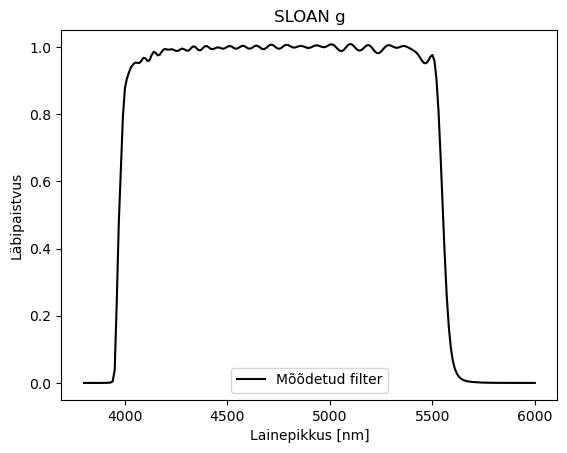

In [401]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_sloang, pealkiri="SLOAN g", faili_nimi="filter_sloan_g.pdf", tee_pdf=True)

## SLOANi g filtri mõõdetud ja standard kokku

In [201]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_SDSSg = pd.read_csv(kataloog + filtri_nimi + 'SLOAN_SDSS.gprime_filter.dat', skiprows=0, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_SDSSg['Lainepikkus'] = standard_SDSSg['Lainepikkus'] *10.0
if DEBUG:
    print(standard_SDSSg['Lainepikkus'])

0       37980.0
1       37990.0
2       38000.0
3       38010.0
4       38020.0
         ...   
2224    60220.0
2225    60230.0
2226    60240.0
2227    60250.0
2228    60260.0
Name: Lainepikkus, Length: 2229, dtype: float64


In [219]:
standard_SDSSg['Lainepikkus'] = standard_SDSSg['Lainepikkus'].div(10.0)


if DEBUG:
    print(standard_SDSSg)

      Lainepikkus  Labipaistvus1
0          3798.0       0.000102
1          3799.0       0.000105
2          3800.0       0.000107
3          3801.0       0.000109
4          3802.0       0.000110
...           ...            ...
2224       6022.0       0.000140
2225       6023.0       0.000132
2226       6024.0       0.000123
2227       6025.0       0.000115
2228       6026.0       0.000106

[2229 rows x 2 columns]


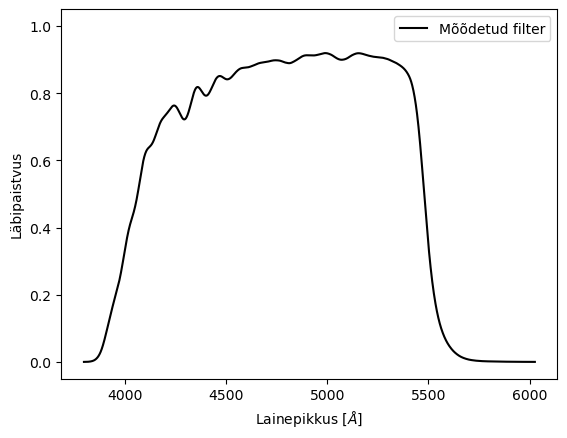

In [221]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(standard_SDSSg)

In [223]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'g/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_SDSSg = pd.read_csv(kataloog + filtri_nimi + 'g_20-50-49.txt', skiprows=15, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_SDSSg = pd.read_csv(kataloog + filtri_nimi + 'ref1_g_20-31-02.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_SDSSg = pd.read_csv(kataloog + filtri_nimi + 'ref2_g_21-09-39.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_SDSSg['Lainepikkus'] = filter_SDSSg['Lainepikkus'] *10.0
filter_SDSSg['Labipaistvus1'] = filter_SDSSg['Signaal'] / ref1_SDSSg['Signaal']
filter_SDSSg['Labipaistvus2'] = filter_SDSSg['Signaal'] / ref2_SDSSg['Signaal']
if DEBUG:
    print(filter_SDSSg['Lainepikkus'])

0      3800.0
1      3810.0
2      3820.0
3      3830.0
4      3840.0
        ...  
216    5960.0
217    5970.0
218    5980.0
219    5990.0
220    6000.0
Name: Lainepikkus, Length: 221, dtype: float64


filter_sloan_g.pdf


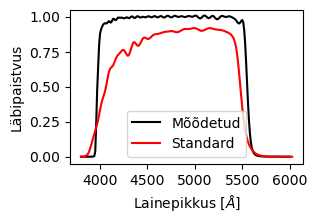

In [298]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_SDSSg, standard_SDSSg, faili_nimi="filter_sloan_g.pdf", tee_pdf=True)

## SLOANi g ülevaade, kiire mõõtmine

In [505]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_sloang = pd.read_csv(kataloog + filtri_nimi + 'g_full_17-57-53.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_sloang = pd.read_csv(kataloog + filtri_nimi + 'ref4_17-27-54.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_sloang = pd.read_csv(kataloog + filtri_nimi + 'ref5_18-12-34.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_sloang['Labipaistvus2'] = filter_kiire_sloang['Signaal'] / ref1_kiire_sloang['Signaal']
filter_kiire_sloang['Labipaistvus1'] = filter_kiire_sloang['Signaal'] / ref2_kiire_sloang['Signaal']
if DEBUG:
    print(filter_kiire_sloang['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [507]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_sloang['ref1'] = ref1_kiire_sloang['Signaal']
filter_kiire_sloang['ref2'] = ref2_kiire_sloang['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_sloang['suhe1'] = filter_kiire_sloang['Signaal'] / ref1_kiire_sloang['Signaal']
filter_kiire_sloang['suhe2'] = filter_kiire_sloang['Signaal'] / ref2_kiire_sloang['Signaal']
filter_kiire_sloang['Lainepikkus'] = filter_kiire_sloang['Lainepikkus'] *10.0
filter_kiire_sloang.to_csv("filtri_ulevaade_sloan_g.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_sloang)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0 -9.000000e-07      -0.000689      -0.000689  0.001306   
1         3010.0 -1.000000e-06      -0.000748      -0.000748  0.001336   
2         3020.0 -7.000000e-07      -0.000511      -0.000511  0.001369   
3         3030.0 -2.000000e-07      -0.000143      -0.000143  0.001400   
4         3040.0 -4.000000e-07      -0.000279      -0.000279  0.001432   
..           ...           ...            ...            ...       ...   
896      11960.0  6.690000e-05       0.109260       0.109367  0.000612   
897      11970.0  7.600000e-05       0.130719       0.130741  0.000581   
898      11980.0  8.630000e-05       0.156058       0.156058  0.000553   
899      11990.0  9.780000e-05       0.185755       0.185720  0.000526   
900      12000.0  1.117000e-04       0.223088       0.223311  0.000501   

         ref2     suhe1     suhe2  
0    0.001306 -0.000689 -0.000689  
1    0.001338 -0.000748 -0.000748  
2  

filtri_ulevaade_sloan_g.pdf


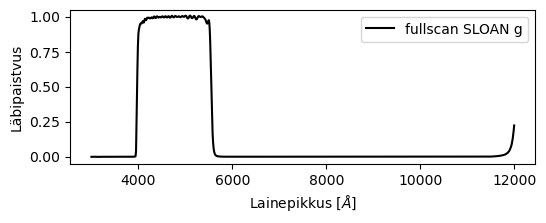

In [509]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_sloang, label="fullscan SLOAN g", faili_nimi="filtri_ulevaade_sloan_g.pdf", tee_pdf=True)

# SLOAN r

## SLOAN-i r lihtsalt filter

In [540]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'r/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_sloanr = pd.read_csv(kataloog + filtri_nimi + 'r_19-54-23.txt', skiprows=15, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_sloanr = pd.read_csv(kataloog + filtri_nimi + 'ref1_r_19-36-52.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_sloanr = pd.read_csv(kataloog + filtri_nimi + 'ref2_r_20-11-52.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_sloanr['Labipaistvus2'] = filter_sloanr['Signaal'] / ref1_sloanr['Signaal']
filter_sloanr['Labipaistvus1'] = filter_sloanr['Signaal'] / ref2_sloanr['Signaal']
if DEBUG:
    print(filter_sloanr['Lainepikkus'])

0      525.0
1      526.0
2      527.0
3      528.0
4      529.0
       ...  
196    721.0
197    722.0
198    723.0
199    724.0
200    725.0
Name: Lainepikkus, Length: 201, dtype: float64


In [542]:
# Kopeerin referentside signaalid filtritabelisse
filter_sloanr['ref1'] = ref1_sloanr['Signaal']
filter_sloanr['ref2'] = ref2_sloanr['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_sloanr['suhe1'] = filter_sloanr['Signaal'] / ref1_sloanr['Signaal']
filter_sloanr['suhe2'] = filter_sloanr['Signaal'] / ref2_sloanr['Signaal']
filter_sloanr['Lainepikkus'] = filter_sloanr['Lainepikkus'] *10.0
filter_sloanr.to_csv("filter_sloan_r.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_sloanr)

     Lainepikkus   Signaal  Labipaistvus2  Labipaistvus1      ref1      ref2  \
0         5250.0  0.000005       0.000032       0.000032  0.144927  0.144931   
1         5260.0  0.000003       0.000023       0.000023  0.145815  0.145855   
2         5270.0  0.000003       0.000019       0.000019  0.146720  0.146754   
3         5280.0  0.000002       0.000016       0.000016  0.147580  0.147652   
4         5290.0  0.000002       0.000015       0.000015  0.148477  0.148508   
..           ...       ...            ...            ...       ...       ...   
196       7210.0  0.000025       0.000131       0.000131  0.188447  0.188519   
197       7220.0  0.000021       0.000110       0.000110  0.187583  0.187634   
198       7230.0  0.000017       0.000092       0.000092  0.186558  0.186620   
199       7240.0  0.000014       0.000077       0.000077  0.185641  0.185693   
200       7250.0  0.000012       0.000064       0.000064  0.184708  0.184762   

        suhe1     suhe2  
0    0.000032

filter_sloan_r.pdf


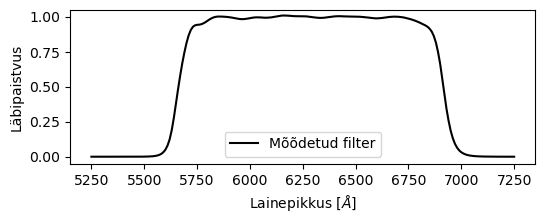

In [544]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_sloanr, faili_nimi="filter_sloan_r.pdf", tee_pdf=True)

## SLOAN-i r kokku minu ja standard

In [233]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_SDSSr = pd.read_csv(kataloog + filtri_nimi + 'SLOAN_SDSS.rprime_filter.dat', skiprows=0, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_SDSSr['Lainepikkus'] = standard_SDSSr['Lainepikkus'] *10.0
if DEBUG:
    print(standard_SDSSr['Lainepikkus'])

In [235]:
standard_SDSSr['Lainepikkus'] = standard_SDSSr['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_SDSSr)

In [239]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'r/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_SDSSr = pd.read_csv(kataloog + filtri_nimi + 'r_19-54-23.txt', skiprows=15, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_SDSSr = pd.read_csv(kataloog + filtri_nimi + 'ref1_r_19-36-52.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_SDSSr = pd.read_csv(kataloog + filtri_nimi + 'ref2_r_20-11-52.txt', skiprows=15, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_SDSSr['Lainepikkus'] = filter_SDSSr['Lainepikkus'] *10.0
filter_SDSSr['Labipaistvus1'] = filter_SDSSr['Signaal'] / ref1_SDSSr['Signaal']
filter_SDSSr['Labipaistvus2'] = filter_SDSSr['Signaal'] / ref2_SDSSr['Signaal']
if DEBUG:
    print(filter_SDSSr)

     Lainepikkus   Signaal  Labipaistvus1  Labipaistvus2
0         5250.0  0.000005       0.000032       0.000032
1         5260.0  0.000003       0.000023       0.000023
2         5270.0  0.000003       0.000019       0.000019
3         5280.0  0.000002       0.000016       0.000016
4         5290.0  0.000002       0.000015       0.000015
..           ...       ...            ...            ...
196       7210.0  0.000025       0.000131       0.000131
197       7220.0  0.000021       0.000110       0.000110
198       7230.0  0.000017       0.000092       0.000092
199       7240.0  0.000014       0.000077       0.000077
200       7250.0  0.000012       0.000064       0.000064

[201 rows x 4 columns]


filtrid_koos_sloan_r.pdf


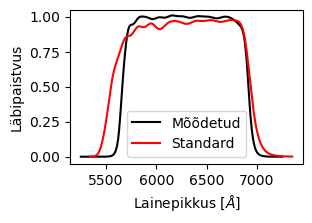

In [548]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_SDSSr, standard_SDSSr, faili_nimi="filtrid_koos_sloan_r.pdf", tee_pdf=True)

## SLOAN-i r ülevaade, kiire mõõtmine

In [511]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_sloanr= pd.read_csv(kataloog + filtri_nimi + 'r_full_18-27-26.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_sloanr = pd.read_csv(kataloog + filtri_nimi + 'ref5_18-12-34.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_sloanr = pd.read_csv(kataloog + filtri_nimi + 'ref6_18-56-46.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_sloanr['Labipaistvus2'] = filter_kiire_sloanr['Signaal'] / ref1_kiire_sloanr['Signaal']
filter_kiire_sloanr['Labipaistvus1'] = filter_kiire_sloanr['Signaal'] / ref2_kiire_sloanr['Signaal']
if DEBUG:
    print(filter_kiire_sloanr['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [513]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_sloanr['ref1'] = ref1_kiire_sloanr['Signaal']
filter_kiire_sloanr['ref2'] = ref2_kiire_sloanr['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_sloanr['suhe1'] = filter_kiire_sloanr['Signaal'] / ref1_kiire_sloanr['Signaal']
filter_kiire_sloanr['suhe2'] = filter_kiire_sloanr['Signaal'] / ref2_kiire_sloanr['Signaal']
filter_kiire_sloanr['Lainepikkus'] = filter_kiire_sloanr['Lainepikkus'] *10.0
filter_kiire_sloanr.to_csv("filtri_ulevaade_sloan_r.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_sloanr)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0  3.000000e-07       0.000230       0.000229  0.001306   
1         3010.0 -1.000000e-07      -0.000075      -0.000075  0.001338   
2         3020.0 -5.000000e-07      -0.000365      -0.000364  0.001371   
3         3030.0 -6.000000e-07      -0.000428      -0.000428  0.001401   
4         3040.0 -1.000000e-07      -0.000070      -0.000070  0.001432   
..           ...           ...            ...            ...       ...   
896      11960.0  5.700000e-06       0.009318       0.009321  0.000612   
897      11970.0  5.700000e-06       0.009806       0.009809  0.000581   
898      11980.0  5.200000e-06       0.009403       0.009417  0.000553   
899      11990.0  5.800000e-06       0.011014       0.011041  0.000527   
900      12000.0  6.400000e-06       0.012795       0.012818  0.000500   

         ref2     suhe1     suhe2  
0    0.001308  0.000230  0.000229  
1    0.001340 -0.000075 -0.000075  
2  

filtri_ulevaade_sloan_r.pdf


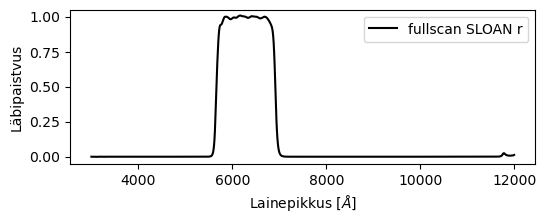

In [515]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_sloanr, label="fullscan SLOAN r", faili_nimi="filtri_ulevaade_sloan_r.pdf", tee_pdf=True)

# SLOANi i

## SLOAN-i i lihtsalt filter

In [243]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'i/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_sloani  = pd.read_csv(kataloog + filtri_nimi + 'i_18-58-22.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_sloani = pd.read_csv(kataloog + filtri_nimi + 'ref1_i_18-37-41.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_sloani = pd.read_csv(kataloog + filtri_nimi + 'ref2_i_19-19-10.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_sloani['Labipaistvus2'] = filter_sloani['Signaal'] / ref1_sloani['Signaal']
filter_sloani['Labipaistvus1'] = filter_sloani['Signaal'] / ref2_sloani['Signaal']
if DEBUG:
    print(filter_sloani['Lainepikkus'])

0      660.0
1      661.0
2      662.0
3      663.0
4      664.0
       ...  
236    896.0
237    897.0
238    898.0
239    899.0
240    900.0
Name: Lainepikkus, Length: 241, dtype: float64


In [245]:
# Kopeerin referentside signaalid filtritabelisse
filter_sloani['ref1'] = ref1_sloani['Signaal']
filter_sloani['ref2'] = ref2_sloani['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_sloani['suhe1'] = filter_sloani['Signaal'] / ref1_sloani['Signaal']
filter_sloani['suhe2'] = filter_sloani['Signaal'] / ref2_sloani['Signaal']
filter_sloani['Lainepikkus'] = filter_sloani['Lainepikkus'] *10.0
filter_sloani.to_csv("filter_sloan_i.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_sloani)

filter_sloan_i.pdf


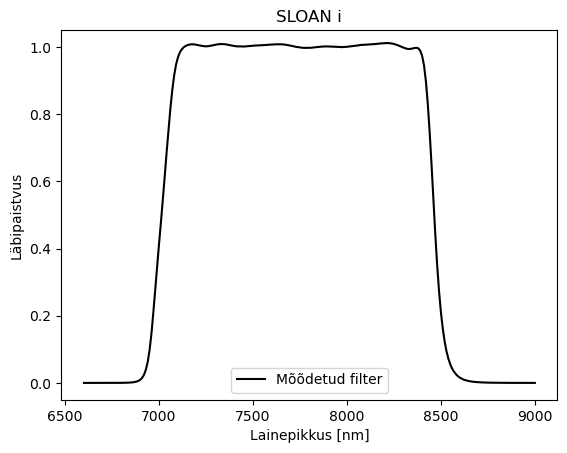

In [453]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_sloani, pealkiri="SLOAN i", faili_nimi="filter_sloan_i.pdf", tee_pdf=True)

## SLOAN-i i filtrid kokku standard ja minu

In [251]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_SDSSi = pd.read_csv(kataloog + filtri_nimi + 'SLOAN_SDSS.iprime_filter.dat', skiprows=0, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_SDSSi['Lainepikkus'] = standard_SDSSi['Lainepikkus'] *10.0
if DEBUG:
    print(standard_SDSSi['Lainepikkus'])

In [253]:
if DEBUG:
    print(standard_SDSSi)

In [255]:
standard_SDSSi['Lainepikkus'] = standard_SDSSi['Lainepikkus'].div(10.0)

if DEBUG:
    print(standard_SDSSi)

In [257]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'i/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_SDSSi  = pd.read_csv(kataloog + filtri_nimi + 'i_18-58-22.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_SDSSi = pd.read_csv(kataloog + filtri_nimi + 'ref1_i_18-37-41.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_SDSSi = pd.read_csv(kataloog + filtri_nimi + 'ref2_i_19-19-10.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_SDSSi['Lainepikkus'] = filter_SDSSi['Lainepikkus'] *10.0
filter_SDSSi['Labipaistvus1'] = filter_SDSSi['Signaal'] / ref1_SDSSi['Signaal']
filter_SDSSi['Labipaistvus2'] = filter_SDSSi['Signaal'] / ref2_SDSSi['Signaal']
if DEBUG:
    print(filter_SDSSi)

In [259]:
filter_SDSSi

,Lainepikkus,Signaal,Labipaistvus1,Labipaistvus2
0,6600.0,0.000002,0.000009,0.000009
1,6610.0,0.000001,0.000005,0.000005
2,6620.0,0.000001,0.000006,0.000006
3,6630.0,0.000001,0.000007,0.000007
4,6640.0,0.000001,0.000007,0.000007
...,...,...,...,...
236,8960.0,0.000009,0.000067,0.000067
237,8970.0,0.000008,0.000060,0.000060
238,8980.0,0.000008,0.000056,0.000056
239,8990.0,0.000007,0.000051,0.000051



fig, ax = plt.subplots()
x = ref2['Lainepikkus']
y = filter['suhe1']
ax.plot(x, y, c='black',label='mõõdetud filter')
x2 = filter_SDSSi['Lainepikkus']
y2 = filter_SDSSi['Signaal']
ax.plot(x2, y2, c="red", label='standardfilter')
ax.set(xlabel='Lainepikkus [nm]', ylabel='Läbipaistvus', 
       title='SLOAN i')
ax.legend()
fig.savefig("SLOAN_i.pdf")
plt.show

filter_sloan_i.pdf


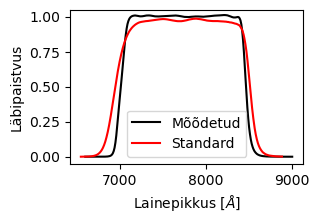

In [302]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_SDSSi, standard_SDSSi, faili_nimi="filter_sloan_i.pdf", tee_pdf=True)

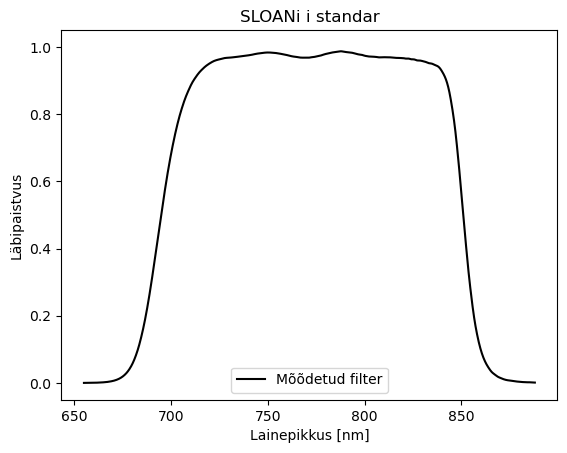

In [472]:

filtri_joonis(standard_SDSSi, pealkiri="SLOANi i standar")

## SLOAN-i i ülevaade, kiire mõõtmine

In [517]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_sloani = pd.read_csv(kataloog + filtri_nimi + 'i_full_18-42-06.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_sloani = pd.read_csv(kataloog + filtri_nimi + 'ref5_18-12-34.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_sloani = pd.read_csv(kataloog + filtri_nimi + 'ref6_18-56-46.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_sloani['Labipaistvus2'] = filter_kiire_sloani['Signaal'] / ref1_kiire_sloani['Signaal']
filter_kiire_sloani['Labipaistvus1'] = filter_kiire_sloani['Signaal'] / ref2_kiire_sloani['Signaal']
if DEBUG:
    print(filter_kiire_sloani['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [519]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_sloani['ref1'] = ref1_kiire_sloani['Signaal']
filter_kiire_sloani['ref2'] = ref2_kiire_sloani['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_sloani['suhe1'] = filter_kiire_sloani['Signaal'] / ref1_kiire_sloani['Signaal']
filter_kiire_sloani['suhe2'] = filter_kiire_sloani['Signaal'] / ref2_kiire_sloani['Signaal']
filter_kiire_sloani['Lainepikkus'] = filter_kiire_sloani['Lainepikkus'] *10.0
filter_kiire_sloani.to_csv("filtri_ulevaade_sloan_i.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_sloani)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0  5.000000e-07       0.000383       0.000382  0.001306   
1         3010.0  2.000000e-07       0.000150       0.000149  0.001338   
2         3020.0 -2.000000e-07      -0.000146      -0.000146  0.001371   
3         3030.0 -2.000000e-07      -0.000143      -0.000143  0.001401   
4         3040.0 -4.000000e-07      -0.000279      -0.000279  0.001432   
..           ...           ...            ...            ...       ...   
896      11960.0  4.500000e-06       0.007357       0.007359  0.000612   
897      11970.0  4.100000e-06       0.007053       0.007056  0.000581   
898      11980.0  3.500000e-06       0.006329       0.006338  0.000553   
899      11990.0  3.400000e-06       0.006457       0.006472  0.000527   
900      12000.0  3.900000e-06       0.007797       0.007811  0.000500   

         ref2     suhe1     suhe2  
0    0.001308  0.000383  0.000382  
1    0.001340  0.000150  0.000149  
2  

filtri_ulevaade_sloan_i.pdf


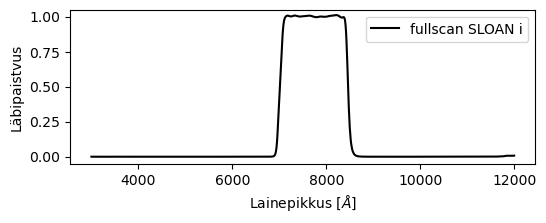

In [523]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_sloani, label="fullscan SLOAN i", faili_nimi="filtri_ulevaade_sloan_i.pdf", tee_pdf=True)

# SLOAN-i $z_{s}$

## SLOAN-i $z_{s}$ lihtsalt filter

In [263]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'zs/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'zs_17-54-44.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'ref1_zs_17-33-24.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'ref2_zs_18-16-05.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_sloanzs['Labipaistvus2'] = filter_sloanzs['Signaal'] / ref1_sloanzs['Signaal']
filter_sloanzs['Labipaistvus1'] = filter_sloanzs['Signaal'] / ref2_sloanzs['Signaal']
if DEBUG:
    print(filter_sloanzs['Lainepikkus'])

0       750.0
1       751.0
2       752.0
3       753.0
4       754.0
        ...  
246     996.0
247     997.0
248     998.0
249     999.0
250    1000.0
Name: Lainepikkus, Length: 251, dtype: float64


In [265]:
# Kopeerin referentside signaalid filtritabelisse
filter_sloanzs['ref1'] = ref1_sloanzs['Signaal']
filter_sloanzs['ref2'] = ref2_sloanzs['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_sloanzs['suhe1'] = filter_sloanzs['Signaal'] / ref1_sloanzs['Signaal']
filter_sloanzs['suhe2'] = filter_sloanzs['Signaal'] / ref2_sloanzs['Signaal']
filter_sloanzs['Lainepikkus'] = filter_sloanzs['Lainepikkus'] *10.0
filter_sloanzs.to_csv("filter_sloan_zs.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_sloanzs)

     Lainepikkus   Signaal  Labipaistvus2  Labipaistvus1      ref1      ref2  \
0         7500.0  0.000003       0.000021       0.000021  0.158255  0.158536   
1         7510.0  0.000002       0.000015       0.000015  0.157145  0.157411   
2         7520.0  0.000002       0.000013       0.000013  0.156080  0.156317   
3         7530.0  0.000002       0.000011       0.000011  0.155017  0.155256   
4         7540.0  0.000001       0.000009       0.000009  0.153961  0.154184   
..           ...       ...            ...            ...       ...       ...   
246       9960.0  0.000003       0.000017       0.000017  0.185535  0.185608   
247       9970.0  0.000003       0.000016       0.000016  0.185049  0.185138   
248       9980.0  0.000003       0.000015       0.000015  0.184444  0.184522   
249       9990.0  0.000003       0.000014       0.000014  0.183918  0.183974   
250      10000.0  0.000003       0.000014       0.000014  0.183237  0.183307   

        suhe1     suhe2  
0    0.000021

filter_sloan_zs.pdf


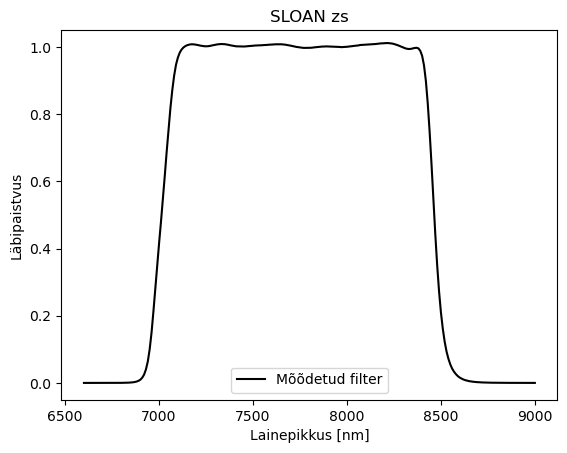

In [487]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_sloani, pealkiri="SLOAN zs", faili_nimi="filter_sloan_zs.pdf", tee_pdf=True)

## SLOANi Z kokku standard ja mõõdetud

In [269]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'Standard_filtrid/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
standard_SDSSz = pd.read_csv(kataloog + filtri_nimi + 'SLOAN_SDSS.zprime_filter.dat', skiprows=0, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Labipaistvus1'])
standard_SDSSz['Lainepikkus'] = standard_SDSSz['Lainepikkus'] *10.0
if DEBUG:
    print(standard_SDSSz['Lainepikkus'])

In [271]:
standard_SDSSz['Lainepikkus'] = standard_SDSSz['Lainepikkus'].div(10.0)


if DEBUG:
    print(standard_SDSSz)

      Lainepikkus  Labipaistvus1
0          7857.0       0.000183
1          7858.0       0.000188
2          7859.0       0.000193
3          7860.0       0.000198
4          7861.0       0.000203
...           ...            ...
5639      13496.0       0.927394
5640      13497.0       0.927354
5641      13498.0       0.927325
5642      13499.0       0.927306
5643      13500.0       0.927300

[5644 rows x 2 columns]


In [275]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'zs/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_SDSSz = pd.read_csv(kataloog + filtri_nimi + 'zs_17-54-44.txt', skiprows=16, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_SDSSz = pd.read_csv(kataloog + filtri_nimi + 'ref1_zs_17-33-24.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_SDSSz = pd.read_csv(kataloog + filtri_nimi + 'ref2_zs_18-16-05.txt', skiprows=16, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_SDSSz['Lainepikkus'] = filter_SDSSz['Lainepikkus'] *10.0
filter_SDSSz['Labipaistvus1'] = filter_SDSSz['Signaal'] / ref1_SDSSz['Signaal']
filter_SDSSz['Labipaistvus2'] = filter_SDSSz['Signaal'] / ref2_SDSSz['Signaal']
if DEBUG:
    print(filter_SDSSz['Lainepikkus'])

0       7500.0
1       7510.0
2       7520.0
3       7530.0
4       7540.0
        ...   
246     9960.0
247     9970.0
248     9980.0
249     9990.0
250    10000.0
Name: Lainepikkus, Length: 251, dtype: float64


filter_sloan_zs.pdf


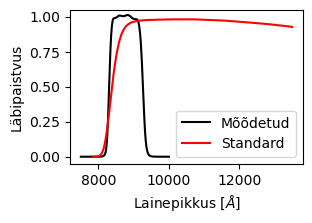

In [304]:
# Funktsiooniga genereeritakse joonis
joonis_standardiga(filter_SDSSz, standard_SDSSz, faili_nimi="filter_sloan_zs.pdf", tee_pdf=True)

## slone-i zs ülevaade, kiire mõõtmine

In [525]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse filtri andmed csv failist ja arvutab läbipaistvuse
filter_kiire_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'zs_full_19-11-33.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref1_kiire_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'ref6_18-56-46.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
ref2_kiire_sloanzs = pd.read_csv(kataloog + filtri_nimi + 'ref7_19-40-51.txt', skiprows=14, sep='\t',
                       usecols=[0,1], names=['Lainepikkus', 'Signaal'])
filter_kiire_sloanzs['Labipaistvus2'] = filter_kiire_sloanzs['Signaal'] / ref1_kiire_sloanzs['Signaal']
filter_kiire_sloanzs['Labipaistvus1'] = filter_kiire_sloanzs['Signaal'] / ref2_kiire_sloanzs['Signaal']
if DEBUG:
    print(filter_kiire_sloanzs['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [527]:
# Kopeerin referentside signaalid filtritabelisse
filter_kiire_sloanzs['ref1'] = ref1_kiire_sloanzs['Signaal']
filter_kiire_sloanzs['ref2'] = ref2_kiire_sloanzs['Signaal']
# Suhe 1 ja Suhe 2 on filtri läbipaistvus kummagi referentsi suhtes
filter_kiire_sloanzs['suhe1'] = filter_kiire_sloanzs['Signaal'] / ref1_kiire_sloanzs['Signaal']
filter_kiire_sloanzs['suhe2'] = filter_kiire_sloanzs['Signaal'] / ref2_kiire_sloanzs['Signaal']
filter_kiire_sloanzs['Lainepikkus'] = filter_kiire_sloanzs['Lainepikkus'] *10.0
filter_kiire_sloanzs.to_csv("filtri_ulevaade_sloan_zs.dat", columns=["Lainepikkus", "Labipaistvus1"], header=False, index=False, sep=' ')
if DEBUG:
    print(filter_kiire_sloanzs)

     Lainepikkus       Signaal  Labipaistvus2  Labipaistvus1      ref1  \
0         3000.0  5.000000e-07       0.000382       0.000382  0.001308   
1         3010.0  2.000000e-07       0.000149       0.000149  0.001340   
2         3020.0 -2.000000e-07      -0.000146      -0.000146  0.001372   
3         3030.0 -4.000000e-07      -0.000285      -0.000285  0.001402   
4         3040.0  2.000000e-07       0.000139       0.000139  0.001434   
..           ...           ...            ...            ...       ...   
896      11960.0  9.300000e-06       0.015209       0.015169  0.000611   
897      11970.0  9.400000e-06       0.016176       0.016137  0.000581   
898      11980.0  9.500000e-06       0.017204       0.017139  0.000552   
899      11990.0  1.020000e-05       0.019417       0.019340  0.000525   
900      12000.0  1.130000e-05       0.022632       0.022568  0.000499   

         ref2     suhe1     suhe2  
0    0.001309  0.000382  0.000382  
1    0.001341  0.000149  0.000149  
2  

filtri_ulevaade_sloan_zs.pdf


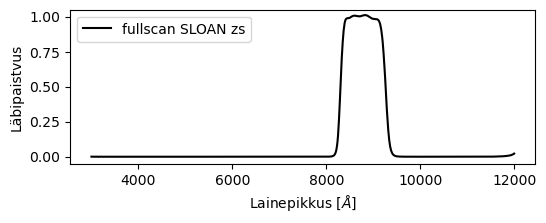

In [531]:
# Funktsiooniga genereeritakse joonis
filtri_joonis(filter_kiire_sloanzs, label="fullscan SLOAN zs", faili_nimi="filtri_ulevaade_sloan_zs.pdf", tee_pdf=True)

# Referentside lambi stabiilsuse kontroll

In [338]:
# Konkreetsele filtrile vastav andmekataloogi nimi
filtri_nimi = 'fullscan_kiire/'
#Loeb sisse referentside andmed csv failist
ref0= pd.read_csv(kataloog + filtri_nimi + '23-39-26.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])


ref1 = pd.read_csv(kataloog + filtri_nimi + 'ref1_15-30-25.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref2 = pd.read_csv(kataloog + filtri_nimi + 'ref2_16-00-04.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref3 = pd.read_csv(kataloog + filtri_nimi + 'ref3_16-44-09.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref4 = pd.read_csv(kataloog + filtri_nimi + 'ref4_17-27-54.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref5 = pd.read_csv(kataloog + filtri_nimi + 'ref5_18-12-34.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref6 = pd.read_csv(kataloog + filtri_nimi + 'ref6_18-56-46.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])

ref7 = pd.read_csv(kataloog + filtri_nimi + 'ref7_19-40-51.txt', skiprows=14, sep='\t',
                     usecols=[0,1], names=['Lainepikkus', 'Signaal'])


if DEBUG:
    print(ref6['Lainepikkus'])

0       300.0
1       301.0
2       302.0
3       303.0
4       304.0
        ...  
896    1196.0
897    1197.0
898    1198.0
899    1199.0
900    1200.0
Name: Lainepikkus, Length: 901, dtype: float64


In [340]:
# Kopeerin referentside signaalid referentsitabelisse
ref1['suhe0'] = ref0['Signaal']
ref1['suhe1'] = ref1['Signaal']
ref1['suhe2'] = ref2['Signaal']
ref1['suhe3'] = ref3['Signaal']
ref1['suhe4'] = ref4['Signaal']
ref1['suhe5'] = ref5['Signaal']
ref1['suhe6'] = ref6['Signaal']
ref1['suhe7'] = ref7['Signaal']
if DEBUG:
    print(ref1)

     Lainepikkus       Signaal     suhe0         suhe1     suhe2     suhe3  \
0          300.0  2.000000e-07  0.001340  2.000000e-07  0.001302  0.001303   
1          301.0 -2.000000e-07  0.001370 -2.000000e-07  0.001334  0.001335   
2          302.0 -7.000000e-07  0.001401 -7.000000e-07  0.001366  0.001367   
3          303.0 -2.000000e-07  0.001432 -2.000000e-07  0.001397  0.001398   
4          304.0  3.000000e-07  0.001463  3.000000e-07  0.001428  0.001429   
..           ...           ...       ...           ...       ...       ...   
896       1196.0  4.840000e-04  0.000545  4.840000e-04  0.000610  0.000611   
897       1197.0  4.502000e-04  0.000519  4.502000e-04  0.000580  0.000580   
898       1198.0  4.160000e-04  0.000493  4.160000e-04  0.000551  0.000551   
899       1199.0  3.839000e-04       NaN  3.839000e-04  0.000525  0.000525   
900       1200.0  3.517000e-04       NaN  3.517000e-04  0.000499  0.000499   

        suhe4     suhe5     suhe6     suhe7  
0    0.001306  0.

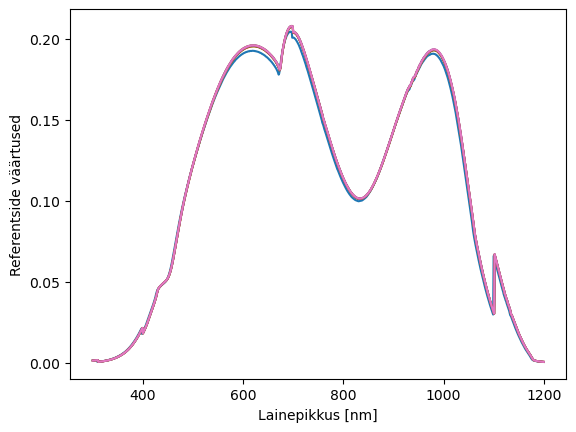

In [520]:
# NB !!! ainult testimiseks
# for-tsükkel referentside signaalide näitamiseks
for i in ['suhe0', 'suhe2', 'suhe3', 'suhe4', 'suhe5', 'suhe6', 'suhe7']:
    plt.plot(ref1['Lainepikkus'], ref1[i])

plt.xlabel("Lainepikkus [nm]")
plt.ylabel('Referentside väärtused')
plt.show()

In [342]:
# Kopeerin referentside signaalid referatsioonitabelisse
ref1['suhe0'] = ref0['Signaal'] / ref7['Signaal']
ref1['suhe1'] = ref1['Signaal'] / ref7['Signaal']
ref1['suhe2'] = ref2['Signaal'] / ref7['Signaal']
ref1['suhe3'] = ref3['Signaal'] / ref7['Signaal']
ref1['suhe4'] = ref4['Signaal'] / ref7['Signaal']
ref1['suhe5'] = ref5['Signaal'] / ref7['Signaal']
ref1['suhe6'] = ref6['Signaal'] / ref7['Signaal']
ref1['suhe7'] = ref7['Signaal'] / ref7['Signaal']
ref1['mean'] = ref1.filter(regex = ("^suhe\\d")).median(axis=1)
if DEBUG:
    print(ref1)

     Lainepikkus       Signaal     suhe0     suhe1     suhe2     suhe3  \
0          300.0  2.000000e-07  1.023220  0.000153  0.994271  0.995341   
1          301.0 -2.000000e-07  1.021778 -0.000149  0.994555  0.995600   
2          302.0 -7.000000e-07  1.020165 -0.000510  0.994395  0.995123   
3          303.0 -2.000000e-07  1.019433 -0.000142  0.994305  0.994804   
4          304.0  3.000000e-07  1.018658  0.000209  0.994013  0.994500   
..           ...           ...       ...       ...       ...       ...   
896       1196.0  4.840000e-04  0.888599  0.789431  0.994944  0.996085   
897       1197.0  4.502000e-04  0.890300  0.772876  0.995193  0.995536   
898       1198.0  4.160000e-04  0.889771  0.750496  0.994227  0.994588   
899       1199.0  3.839000e-04       NaN  0.727911  0.995449  0.994881   
900       1200.0  3.517000e-04       NaN  0.702417  0.996605  0.996405   

        suhe4     suhe5     suhe6  suhe7      mean  
0    0.997327  0.997403  0.999389    1.0  0.997365  
1    

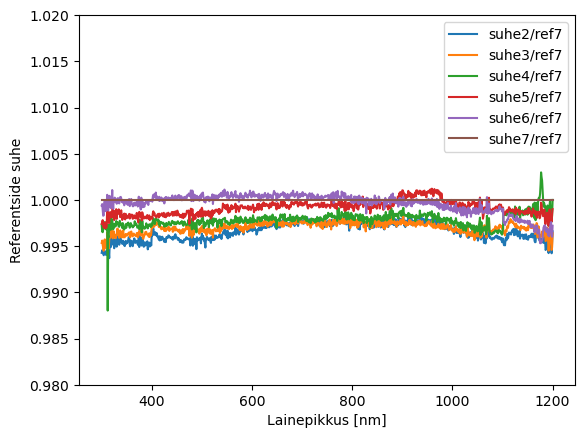

In [350]:
# for-tsükkel kõigi referentside esitamiseks viimase referentsi suhtes
for i in ['suhe2', 'suhe3', 'suhe4', 'suhe5', 'suhe6', 'suhe7']:
    plt.plot(ref1['Lainepikkus'], ref1[i], label=i + "/ref7")

plt.xlabel("Lainepikkus [nm]")
plt.ylabel('Referentside suhe')
plt.ylim(0.98, 1.02)
plt.legend()
plt.show()

<>:6: SyntaxWarning: invalid escape sequence '\A'
<>:6: SyntaxWarning: invalid escape sequence '\A'
C:\Users\kasutaja\AppData\Local\Temp\ipykernel_12716\1939756709.py:6: SyntaxWarning: invalid escape sequence '\A'
  ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Referentside suhe')


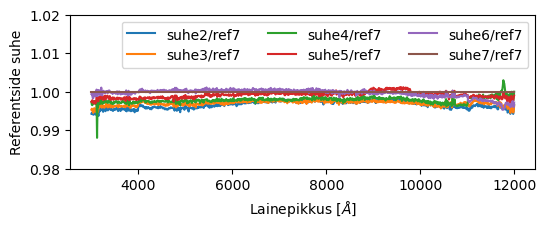

In [358]:
# Referentside stabiilsuse graafik töösse lisamiseks
fig, ax = plt.subplots()
fig.set_figheight(2)
fig.set_figwidth(6)
for i in ['suhe2', 'suhe3', 'suhe4', 'suhe5', 'suhe6', 'suhe7']:
    ax.plot(ref1['Lainepikkus']*10.0, ref1[i], label=i + "/ref7")
ax.set(xlabel='Lainepikkus [$\AA$]', ylabel='Referentside suhe')
ax.legend(ncol=3)
ax.set_ylim(0.98, 1.02)
fig.savefig("referentside_suhted.pdf", bbox_inches ='tight')
plt.show()